<a href="https://colab.research.google.com/github/SahilGolait/Credit-card-default-prediction/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit card default prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Sahil Rahul Golait


# **Project Summary -**

The aim of a credit card default prediction project is to develop a machine learning model that can accurately predict which credit card users are likely to default on their payments in the future. The model should use historical data of credit card users such as their payment history, credit limit, age, education, and other demographic information to identify patterns and trends that can help predict default behavior. The project focuses on utilizing historical data of Customer's default payment in Taiwan.


*   There were 30000 records and 25 attributes in the dataset.
*   We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.


*   After that, the outliers and null values were checked from the raw data. Data were transformed to ensure that it was compatible with machine learning models.

*   In feature engineering we transformed raw data into a more useful and informative form, by encoding, feature manipulation, and feature selection. We handled target class imbalance using SMOTE.
*   Then finally cleaned and scaled data was sent to various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model. To select the final model based on requirements, we checked model_result.


*   When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, focusing more on the Recall score and F1 score because we are dealing with credit card data and our data is unbalanced.





# **GitHub Link -**

https://github.com/SahilGolait/Credit-card-default-prediction

# **Problem Statement**


Despite high returns, credit cards carry significant risks. The ever-expanding number of credit cards has achieved an expansion in how much credit card defaults and the subsequent enormous measure of bills and repayment data information have likewise carried specific hardships to the risk controllers. As a result, one of the primary concerns of banks is how to use the data generated by users and extract useful information to control risks, reduce the default rate, and control the growth of non-performing assets.

A credit card issuer based in Taiwan wants to learn more about how likely its customers are to default on their payments and the main factors that influence this probability. The issuer's decisions regarding who to issue a credit card to and what credit limit to offer would be informed by this information. The issuer's future strategy, including plans to offer targeted credit products to their customers, would be informed by a better understanding of their current and potential customers as a result of this.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy.stats import *

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
credit_df = pd.read_csv('/content/drive/MyDrive/default of credit card clients file.csv', header = 1)


### Dataset First View

In [4]:
# Dataset First Look
credit_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
credit_df.shape

(30000, 25)

### Dataset Information

In [6]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_values = len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",duplicate_values)

The number of duplicate values in the data set is =  0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

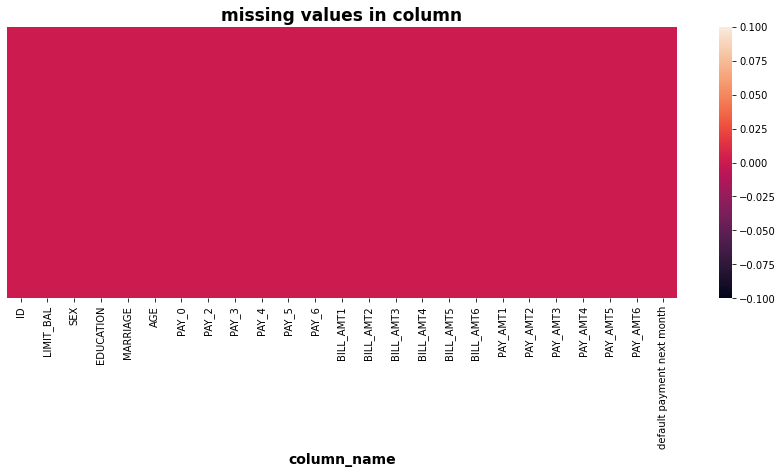

In [9]:
# Visualizing the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(credit_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

There are 30000 rows and 25 columns in the dataset. The dataset does not contain any duplicate or missing values.

The given dataset is from the banking industry. Our task is to examine customer credit default and its causes.The proactive identification of customers most likely to default on loan payments is the first step in predicting customer loan default. This is typically done by dynamically analyzing pertinent customer data and actions.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Dataset Describe
credit_df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

### Variables Description 

The dataset contains data from credit card indistry in Taiwan and has collected the usage, historical payments and default status of the customers.

**Attribute Information:**

*   ID : ID of each client
*   LIMIT_BAL : Amount of given credit in NT dollars
*   SEX : Gender (1=male, 2=female)
*   EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*   MARRIAGE : Marital status (1=married, 2=single, 3=others)

*   AGE : Age in years
*   PAY_0 : Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

*   PAY_2 : Repayment status in August, 2005 (scale same as above)
*   PAY_3 : Repayment status in July, 2005 (scale same as above)
*   PAY_4 : Repayment status in June, 2005 (scale same as above)

*   LPAY_5 : Repayment status in May, 2005 (scale same as above)

*   PAY_6 : Repayment status in April, 2005 (scale same as above)

*   BILL_AMT1 : Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2 : Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3 : Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4 : Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5 : Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6 : Amount of bill statement in April, 2005 (NT dollar)

*   PAY_AMT1 : Amount of previous payment in September, 2005 (NT dollar)

*   PAY_AMT2 : Amount of previous payment in August, 2005 (NT dollar)

*   PAY_AMT3 : Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4 : Amount of previous payment in June, 2005 (NT dollar)
*   PAY_AMT5 : Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6 : Amount of previous payment in April, 2005 (NT dollar)



*   default payment next month : Default payment (1=yes, 0=no)







### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
credit_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
credit_df.rename(columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"}, inplace=True)

# Drop the 'ID' column 
credit_df.drop(["ID"], axis=1, inplace=True)

# Replace values in SEX, MARRIAGE and EDUCATION variables, refering the dataset description,
credit_df['SEX'] = credit_df['SEX'].replace({1:'Male', 2:'Female'})
credit_df['EDUCATION'] = credit_df['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
credit_df['MARRIAGE'] = credit_df['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})
credit_df.head()
     

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000  Female  University  Married   24      2      2     -1     -1   
1     120000  Female  University   Single   26     -1      2      0      0   
2      90000  Female  University   Single   34      0      0      0      0   
3      50000  Female  University  Married   37      0      0      0      0   
4      50000    Male  University  Married   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   DEFAULT  
0        1  
1        1  
2        0  
3        0  
4        0

### What all manipulations have you done and insights you found?

Answer Here.The id entries are unique for every row and seem to serve the purpose of a serial number. So, I drop that column. Encode some numerical column like 'Sex', 'EDUCATION', 'MARRIAGE' into categorical values. Rename 'PAY_0' column into 'PAY_1' and 'default payment next month' into 'DAFUALT' colum.



We are focusing on several key columns of our dataset, including 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', and 'PAY_AMT' as they contain a wealth of information.
By utilizing these features, we plan to create a classification model and implement various classification algorithms.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Percentage of Default and Non-Default Payment')

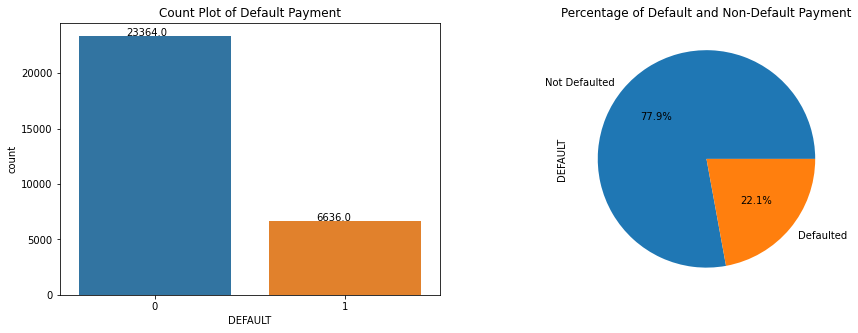

In [14]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Univariate analysis: Count Plot for Default Payment
count = sns.countplot(data=credit_df, x='DEFAULT', ax=ax[0])
count.set_title('Count Plot of Default Payment')

for p in count.patches:
   count.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# adding value count on the top of bar
#for p in count.patches:
#  count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Univariate analysis : Percentage of Default and Non-Default Payment 
pie = credit_df['DEFAULT'].value_counts().plot(kind='pie',autopct="%1.1f%%",labels=['Not Defaulted','Defaulted'], ax=ax[1])
pie.set_title('Percentage of Default and Non-Default Payment')

##### 1. Why did you pick the specific chart?

Answer Here. For "DEFAULT" column I use count plot and pie Chart because count plot gives exact count of defaulter and non defaulter payment and pie cart gives exact percentage of transaction.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- 



*   We can observe from the graphs that the number of default payments in the data is low in number compared to the number of not default payments. The count of default payments is 6636 while the count of not default payments is 23364.

*   By percentage 22.1% of customers defaulted on their payment whereas 77.9% of customers do not default on their credit card payment.
*   We can say that the data is highly imbalanced which we need to balance. We will do that in the feature engineering step.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- Defaulter payments leads the huge loss for company.

#### Chart - 2 :- Age Distribution

Text(0.5, 1.0, 'Boxplot of customer Age')

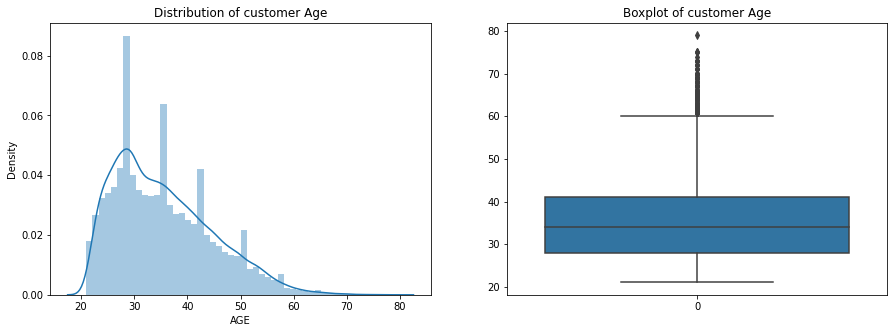

In [15]:
# Chart - 2 visualization code
# Distribution of age of customers
fig,ax = plt.subplots(1,2, figsize=(15,5))

distplot = sns.distplot(credit_df['AGE'], ax=ax[0])
distplot.set_title('Distribution of customer Age')

boxplot =sns.boxplot(credit_df['AGE'], ax=ax[1])
boxplot.set_title('Boxplot of customer Age')

#plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.:-

Distplot is used to check the Skewness of 'AGE' column and Boxplot is use to check the outlier of the column.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-


*   The data spread for AGE is 21 to 79

*   Most of the customers fall under the age bracket 25 to 35

*   A few outliers after the age of 60

*   The histogram shows few peaks around the ages 30, 35, 40 and 50 which indicates more customers for these ages


*   The AGE data is slightly right skewed .






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :- This 'AGE' column has slighly right skewed and also have outlier for age more than 60 this outlier impact our model a lot.

#### Chart - 3 :-  AGE against GENDER along with default column

In [16]:
credit_df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

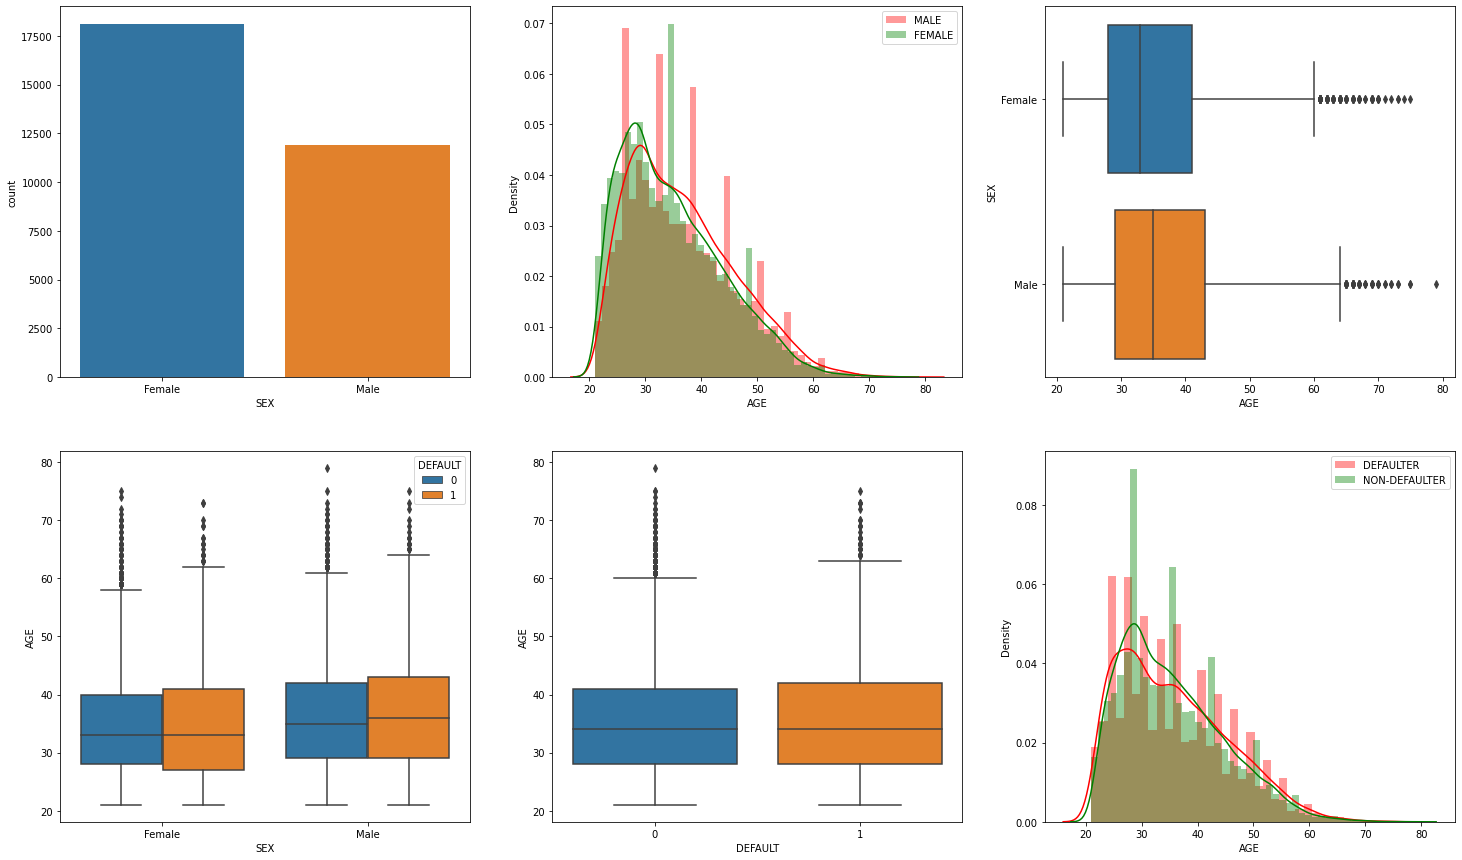

In [17]:
# Chart - 3 visualization code
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.countplot(data=credit_df, x='SEX')

plt.subplot(2,3,2)
sns.distplot(credit_df[credit_df['SEX']=='Male']['AGE'], color='r', label='MALE')
sns.distplot(credit_df[credit_df['SEX']=='Female']['AGE'], color='g', label='FEMALE')
plt.legend()

plt.subplot(2,3,3)
sns.boxplot(data= credit_df, x= credit_df['AGE'], y= credit_df['SEX'])

plt.subplot(2,3,4)
sns.boxplot(data= credit_df,x= credit_df['SEX'], y= credit_df['AGE'], hue=credit_df['DEFAULT'])

plt.subplot(2,3,5)
sns.boxplot(data= credit_df, x= credit_df['DEFAULT'], y= credit_df['AGE'])

plt.subplot(2,3,6)
sns.distplot(credit_df[credit_df['DEFAULT']==1]['AGE'], color='r', label='DEFAULTER')
sns.distplot(credit_df[credit_df['DEFAULT']==0]['AGE'], color='g', label='NON-DEFAULTER')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.:- count plot is use to give the exact count of variable.
Distplot is used to check the Skewness of column and Boxplot is use to check the outlier of the column.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- 

*   From the age distribution by gender, we see that the peaks we saw earlier are mostly male customers. But despite that, we still have more female customers in total.
*   In 'SEX' column countof female is more than that of male.

*   From the age distribution by default, we see that:
The customers in the age bracket 25 to 35 are more non-defaulters
After the age of 40, we see slightly more defaulters than non-defaulters.
*   From the graphs we observe that there isn't much difference in ages for defaulters and non defaulters





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

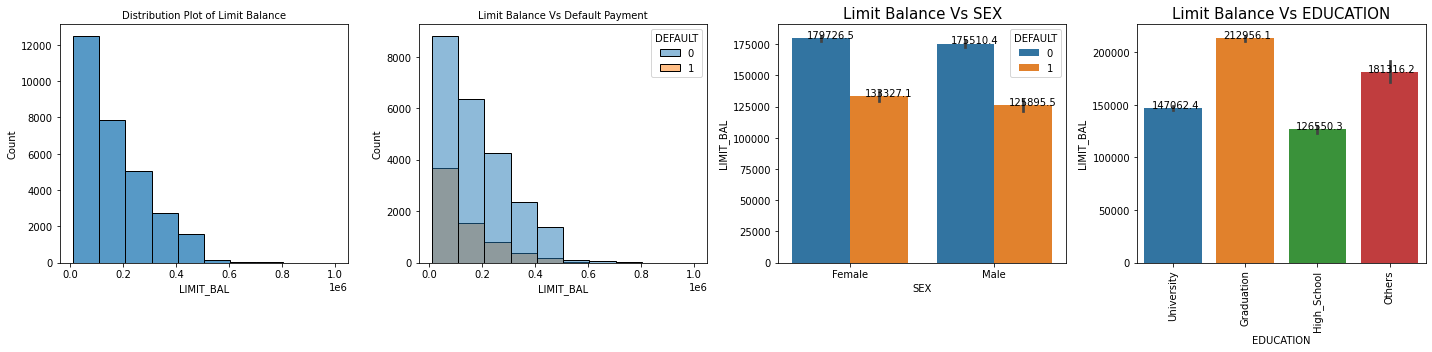

In [18]:
# Chart - 4 visualization code

fig,ax = plt.subplots(1,4, figsize=(20,5))

# Distribution analysis of Limit Balance
hist = sns.histplot(credit_df['LIMIT_BAL'],bins=10, ax=ax[0])
hist.set_title('Distribution Plot of Limit Balance', size=10)

# Bi-variate analysis: Limit Balance Vs Default Payment
hist = sns.histplot(data=credit_df, x='LIMIT_BAL', hue='DEFAULT',bins=10, ax=ax[1])
hist.set_title('Limit Balance Vs Default Payment', size=10)

# Multi-variate analysis
# Limit Balance Vs SEX
bar = sns.barplot(data=credit_df, x='SEX', y='LIMIT_BAL',hue='DEFAULT', ax=ax[2])
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))

# Bi-variate analysis : Limit Balance Vs EDUCATION
bar = sns.barplot(data=credit_df, x='EDUCATION', y='LIMIT_BAL', ax=ax[3])
bar.set_title('Limit Balance Vs EDUCATION', size=15)

# adding value count on the top of bar
for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))

# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- 

*   Most of the customers get up to 2 lakhs of credit limit balance.

*   There appears to be a negative correlation between the percentage of defaults and credit limit.
*   On average females gets more limit than males. The female has an average of 156k while the male has an average of 150k.


*   Graph also indicates that higher education means a higher credit limit.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

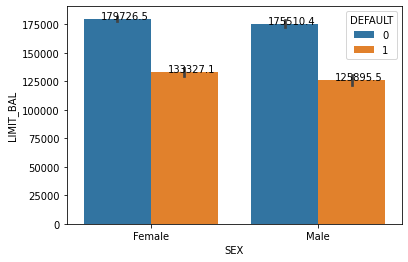

In [19]:
# Chart - 5 visualization code
# Multi-variate analysis :SEX Vs Default Payment with Limit Balance
bar = sns.barplot(data=credit_df, x='SEX', y='LIMIT_BAL', hue='DEFAULT')

# adding value count on the top of bar
for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))

plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here:- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- Number of males who defaulted is less in number but the proportion is greater. It might be possible because males have fewer credit limits on their credit cards as we can see in the graph too.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

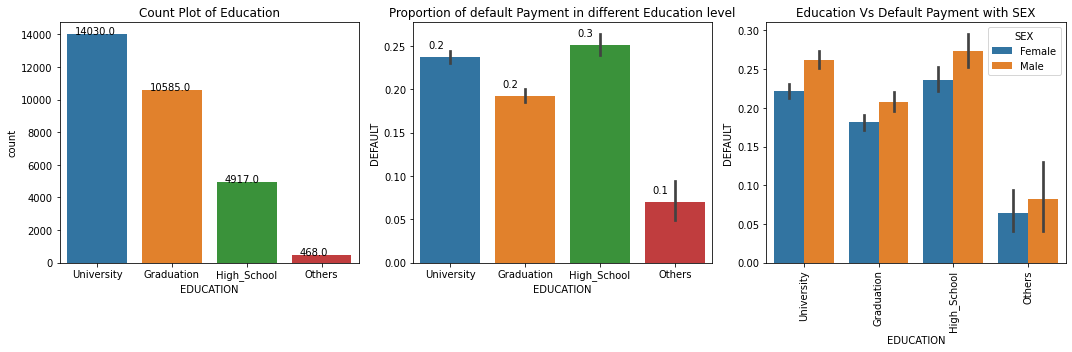

In [20]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(data= credit_df, x='EDUCATION', ax=ax[0])
count.set_title('Count Plot of Education')

# adding value count on the top of bar
for p in count.patches:
   count.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))

# Bi-variate analysis :-EDUCATION Vs Default Payment
bar = sns.barplot(data=credit_df, x='EDUCATION', y='DEFAULT', ax=ax[1])
bar.set_title('Proportion of default Payment in different Education level')

# adding value count on the top of bar
for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.xticks(rotation=90)

# Multi-variate analysis :- EDUCATION Vs Default Payment with SEX
bar = sns.barplot(data=credit_df, x='EDUCATION', y='DEFAULT', hue='SEX', ax=ax[2])
bar.set_title('Education Vs Default Payment with SEX')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:-A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- 

*   10,585 people with degrees from graduate schools; 14,030 individuals with college degrees; 4,917 people with high school degrees. Count of customers who has completed University is most in numbers followed by Graduate School and High School.

*   With the rise in education level proportion of default decreases. We can see that Graduate School education level customers defaulted by 19% while University Education level customer default percentage is 24% followed by High School with 25%
*   In almost all education levels females have less default percentage than males.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

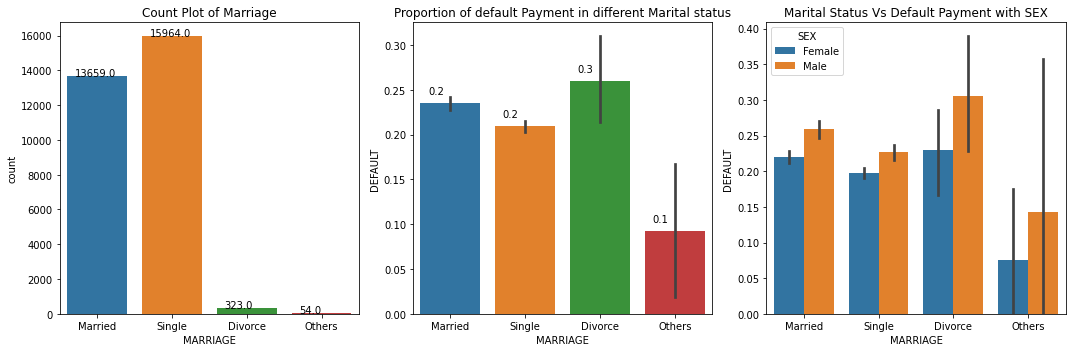

In [21]:
# Chart - 7 visualization code
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(data= credit_df, x='MARRIAGE', ax=ax[0])
count.set_title('Count Plot of Marriage')

# adding value count on the top of bar
for p in count.patches:
   count.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))


# Bi-variate analysis :- MARRIAGE Vs Default Payment
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='DEFAULT', ax=ax[1])
bar.set_title('Proportion of default Payment in different Marital status')

# adding value count on the top of bar
for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))


# Multi-variate analysis :-MARRIAGE Vs Default Payment with SEX
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='DEFAULT', hue='SEX', ax=ax[2])
bar.set_title('Marital Status Vs Default Payment with SEX')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:- A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- 

*   13,659 people who are married; 15,964 single people; 323 people who divorced; 54 people who are considered "others." Count of customers who are single is most in numbers followed by married and divorced.

*   The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count).

*   In 'MARRIAGE' column females have less default percentage than males.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

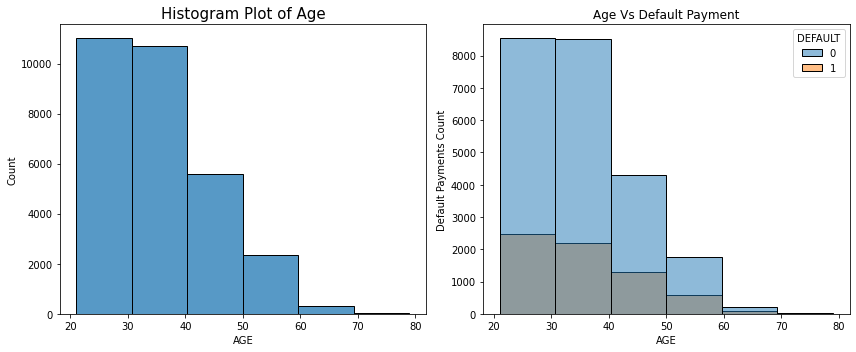

In [22]:
# Chart - 8 visualization code
fig,ax = plt.subplots(1,2, figsize=(12,5))

# Distribution analysis of Age
hist = sns.histplot(credit_df['AGE'],bins=6, ax=ax[0])
hist.set_title('Histogram Plot of Age', size=15)

# Bi-variate analysis:- Age Vs Default Payment
hist = sns.histplot(data=credit_df, x='AGE', hue='DEFAULT', bins=6, ax=ax[1])
hist.set(title='Age Vs Default Payment',ylabel='Default Payments Count')

plt.tight_layout()
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.:- A histogram is a graph that shows the frequency of numerical data using rectangles. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- 

*   With the increase in age the count of customers decreases. Most of the customers belong to the 20-30 year age group followed by the 30-40 age group.

*   With an increase in the age group the count of default payments decreases.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

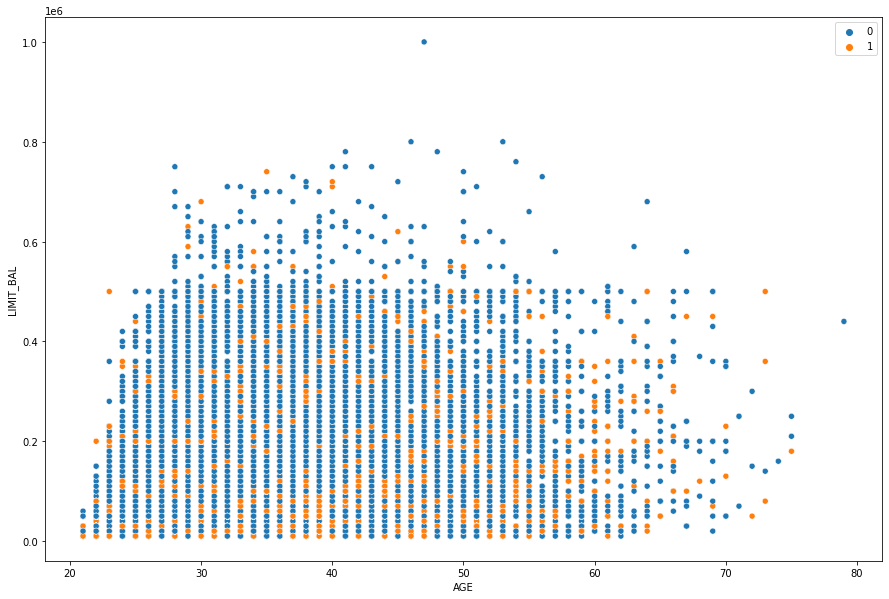

In [23]:
# Chart - 9 visualization code
# Bivariate/Mutivariate analysis:AGE and LIMIT_BAL along with default
plt.figure(figsize=(15,10))
sns.scatterplot(data= credit_df, x=credit_df['AGE'], y=credit_df['LIMIT_BAL'], hue=credit_df['DEFAULT'])
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:-A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

*   No pattern or relationship could be deduced between AGE and LIMIT_BAL.

*   But there is a small probability that if the age and limit balance of customers are higher, chances of defaulting are slightly lower.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

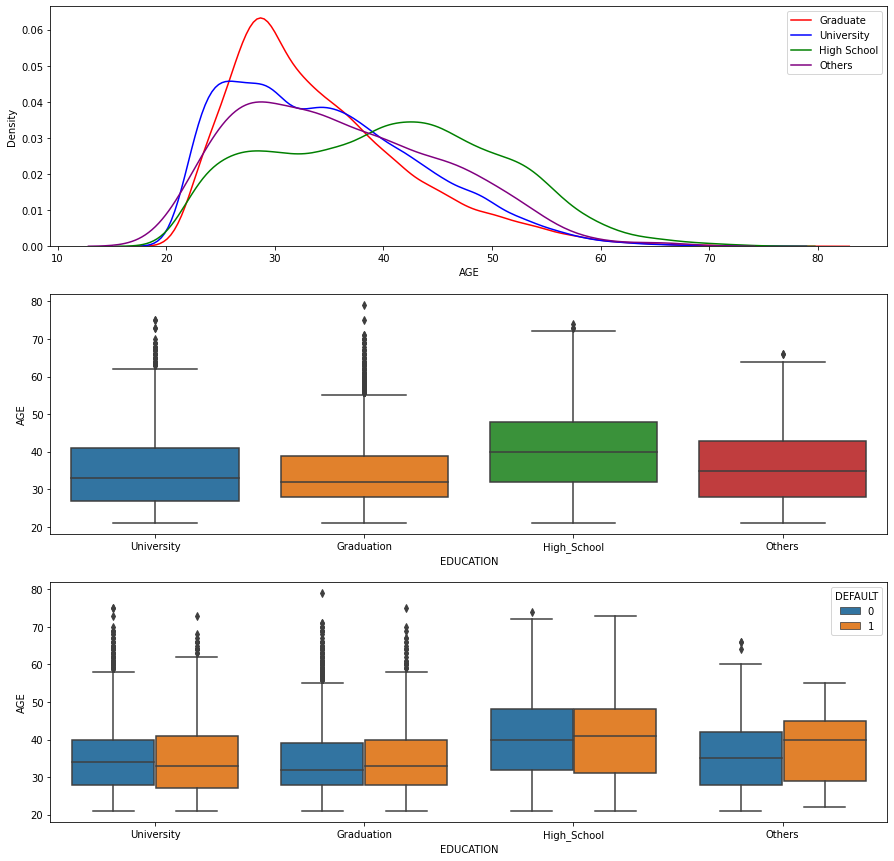

In [24]:
# Chart - 10 visualization code
# Bivariate/Mutivariate analysis: AGE and EDUCATION along with default

plt.figure(figsize=(15, 15))

# Distribution of age by education
plt.subplot(3,1,1)
sns.distplot(credit_df[credit_df['EDUCATION']=='Graduation']['AGE'], label='Graduate', color='red', hist=False)
sns.distplot(credit_df[credit_df['EDUCATION']=='University']['AGE'], label='University', color='blue', hist=False)
sns.distplot(credit_df[credit_df['EDUCATION']=='High_School']['AGE'], label='High School', color='green', hist=False)
sns.distplot(credit_df[credit_df['EDUCATION']=='Others']['AGE'], label='Others', color='purple', hist=False)
plt.legend()

# Boxplot displaying distribution of age by education
plt.subplot(3,1,2)
sns.boxplot(data= credit_df, x=credit_df['EDUCATION'], y=credit_df['AGE'])

# Boxplot displaying distribution of age by education and 'default'
plt.subplot(3,1,3)
sns.boxplot(data= credit_df, x=credit_df['EDUCATION'], y=credit_df['AGE'], hue=credit_df['DEFAULT'])

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:-Boxplot is use to check the outlier of the column.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-When we differentiate the education categories based of default value, we see that the median age is somewhat similar for both defaulters and non-dfaulters for every group except for 'Others'. Here the median age of defaulters is slightly higher than non-defulters. This should be noted.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

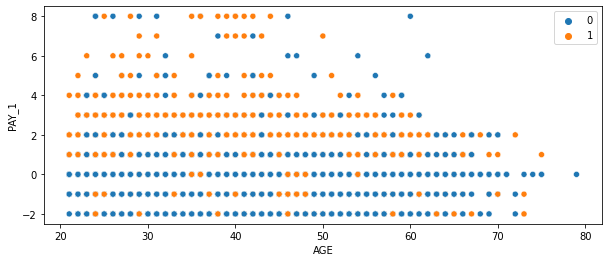

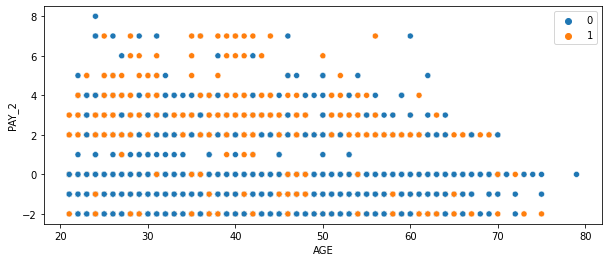

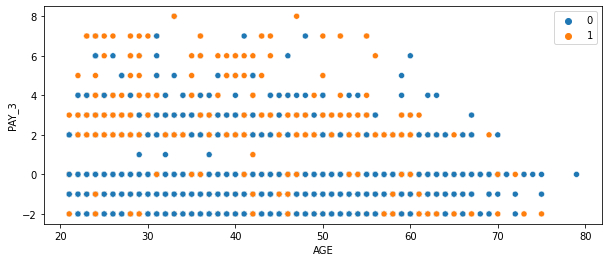

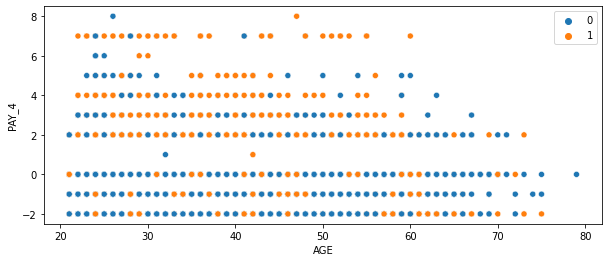

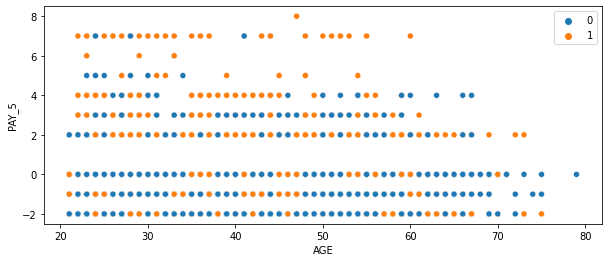

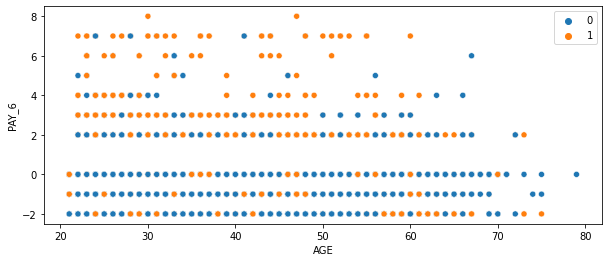

In [25]:
# Chart - 11 visualization code
# AGE and repayment status(PAY_1 to PAY_6) along with default
pay_cols = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6']
for col in pay_cols:
  plt.figure(figsize=(10,4))
  sns.scatterplot(data=credit_df, x= credit_df['AGE'], y=credit_df[col], hue=credit_df['DEFAULT'])
  plt.legend()
     

##### 1. Why did you pick the specific chart?

Answer Here.:- A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

*   Customers with repayment status 0 and below have less number of defaulters, altogether.

*   As the repayment status moves higher values, ie, as the payment delay increases months, there are more defaulters thn non-defaulters.
*   But as far as significance of AGE on repayment status is concerned, the graph doesn't show much relationship/patterns.

*   It can be visually deduced that AGE has no significance on repayment statuses.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

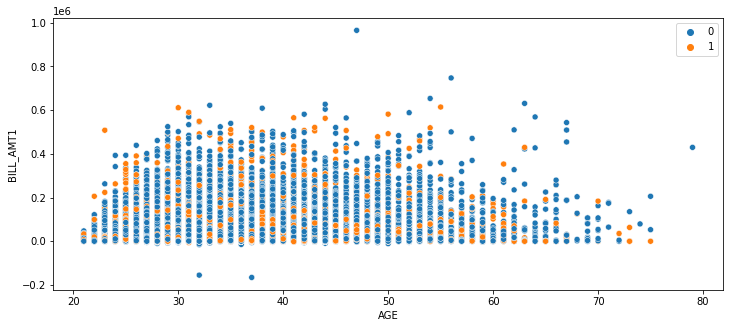

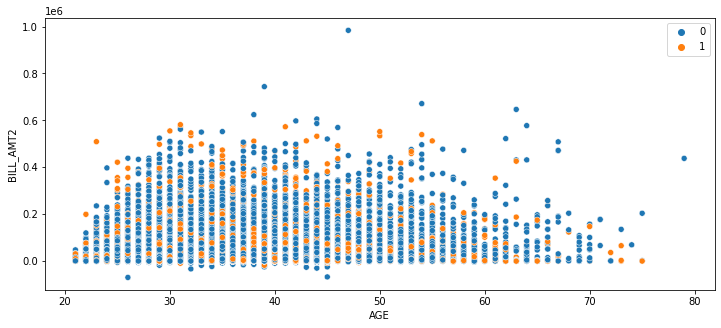

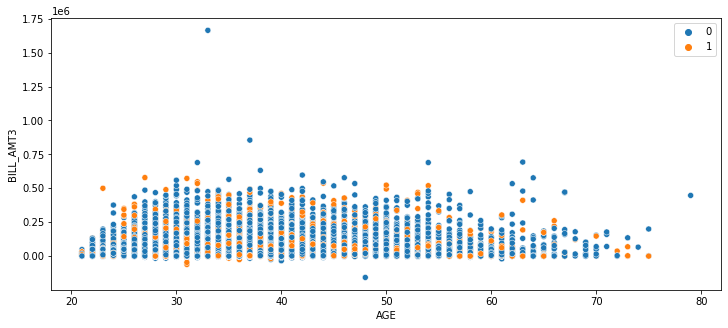

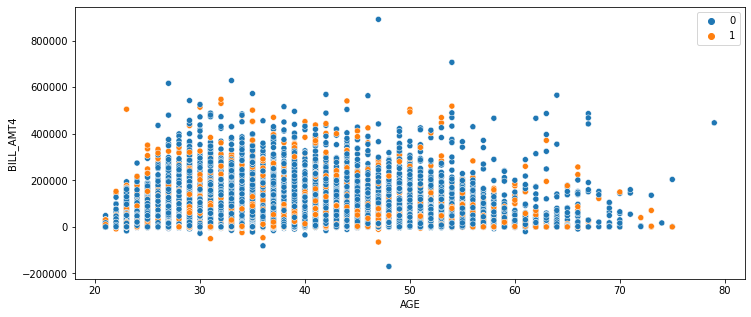

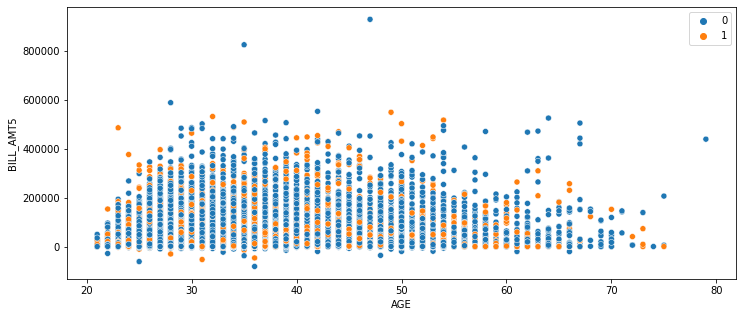

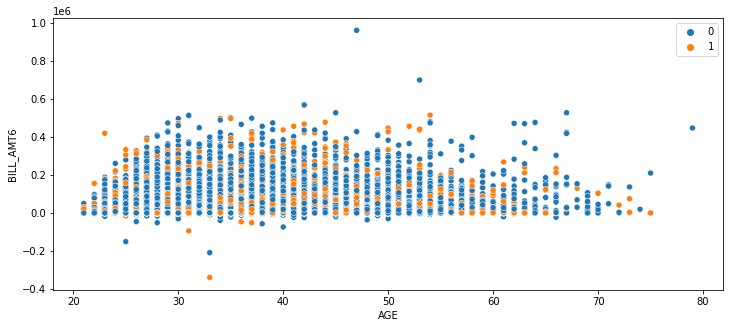

In [26]:
# Chart - 12 visualization code
# AGE and Bill Amounts(BILL_AMT1 to BILL_AMT6) and aling with default

bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in bill_amt_cols:
  plt.figure(figsize=(12,5))
  sns.scatterplot(data=credit_df, x= credit_df['AGE'], y=credit_df[col], hue=credit_df['DEFAULT'])
  plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.:- A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-We can observe than customers with -ve bill amount(customers who 'overpaid' bill amount), have been classified as defaulter. This needs to be explored more.
-Otherwise, there doesn't seem to have any significant effect of age on bill amount.

Therefore, using the visualisation, we can assume that age does not have any effect on bill amount.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

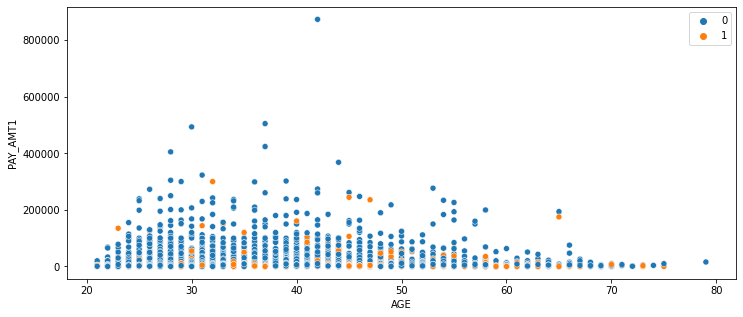

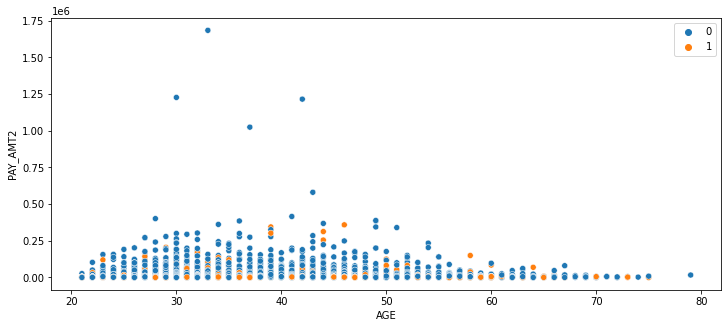

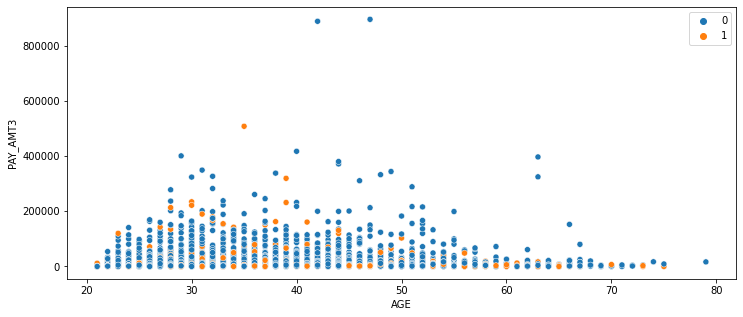

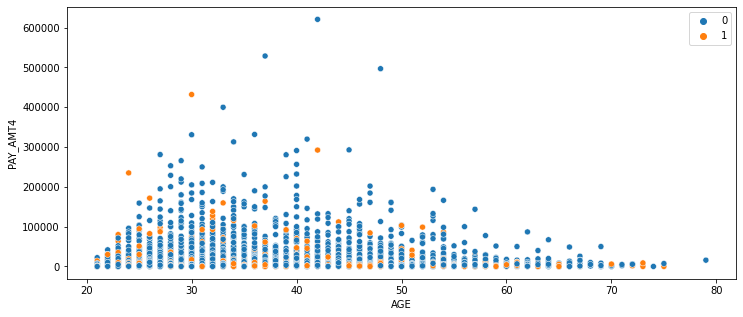

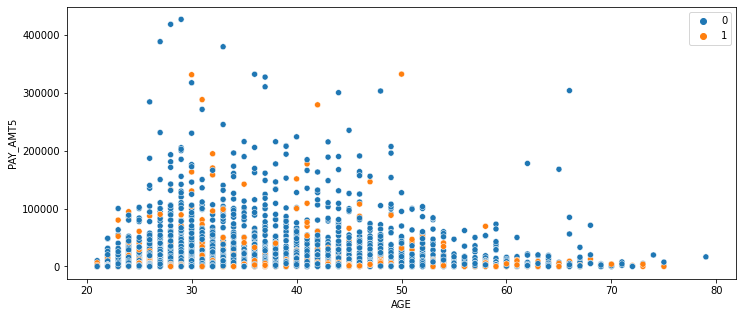

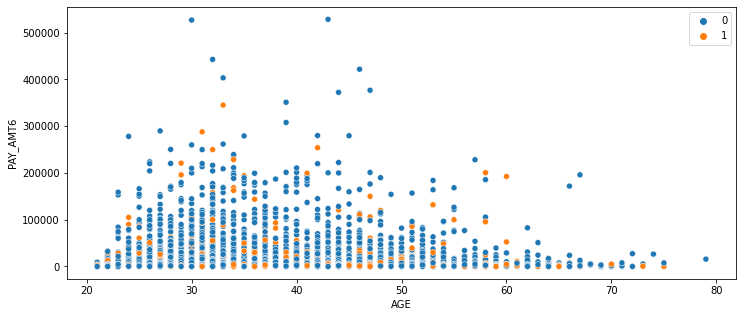

In [27]:
# Chart - 13 visualization code
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in pay_amt_cols:
  plt.figure(figsize=(12,5))
  sns.scatterplot(data=credit_df, x= credit_df['AGE'], y=credit_df[col], hue=credit_df['DEFAULT'])
  plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.:- A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here :-

*   Customers who have high payment amounts are mostly people below 50 years of age.

*   The number of defaulters below 30 years of age and low payment amounts have decreased as we move from April to September.


Visually, we may assume that AGE has an effect on payment amounts.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart

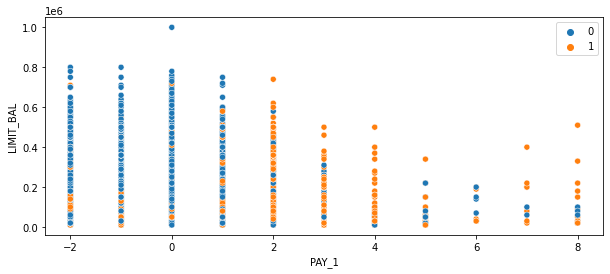

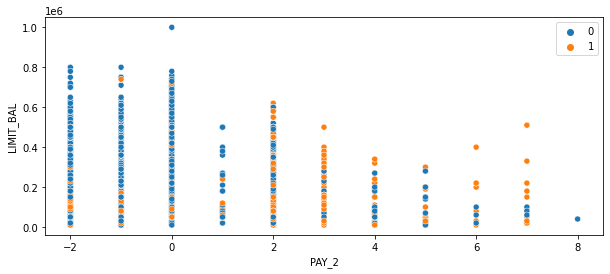

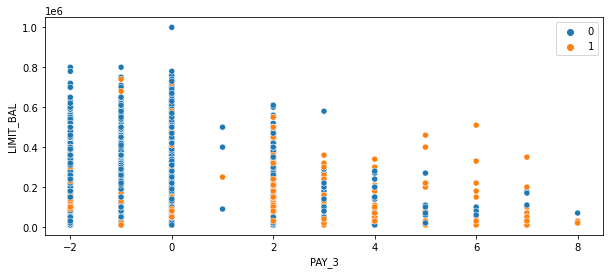

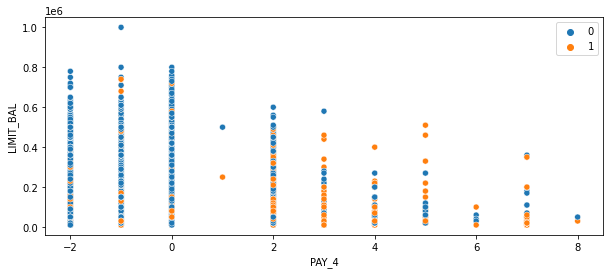

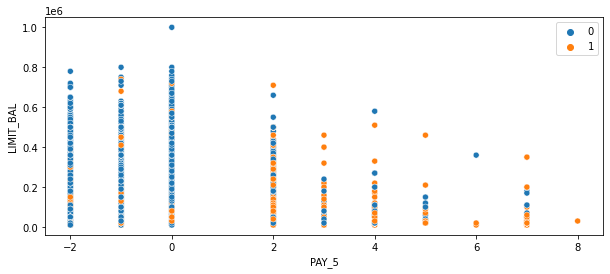

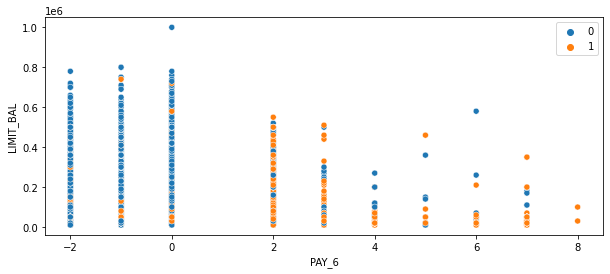

In [28]:
# Limit Balance and Repayment Status(PAY_1 to PAY_6)
pay_cols = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6']
for col in pay_cols:
  plt.figure(figsize=(10,4))
  sns.scatterplot(data=credit_df, y= credit_df['LIMIT_BAL'], x=credit_df[col], hue=credit_df['DEFAULT'])
  plt.legend()
     

No particular patterns are visible even though the number of defaulters among customers with low limit balance seem to increase slightly among reayment statuses 2, 3, 4 from April to September.

### chart

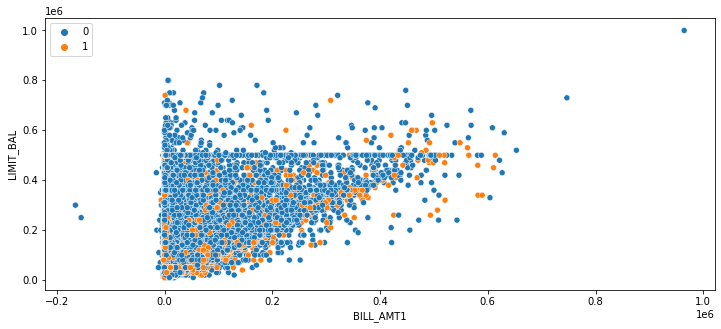

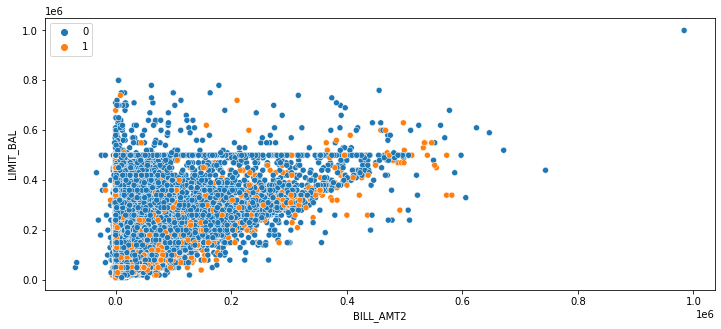

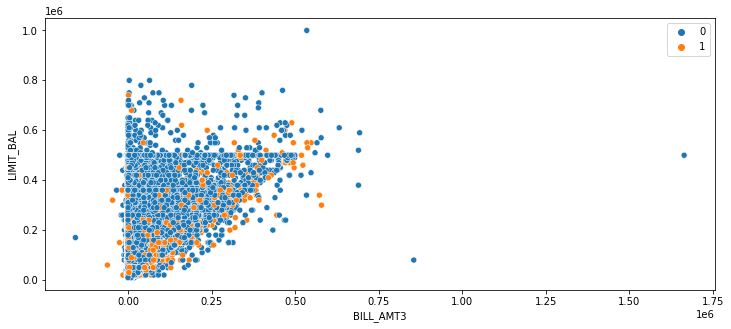

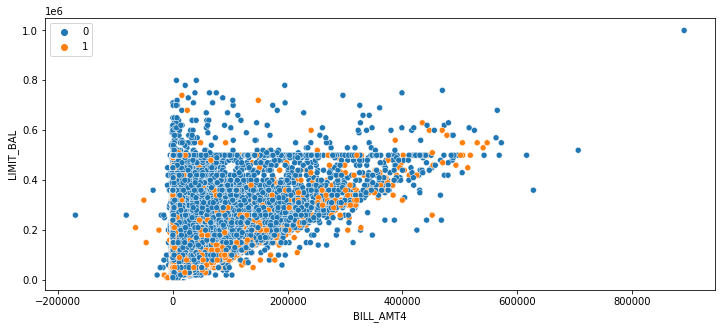

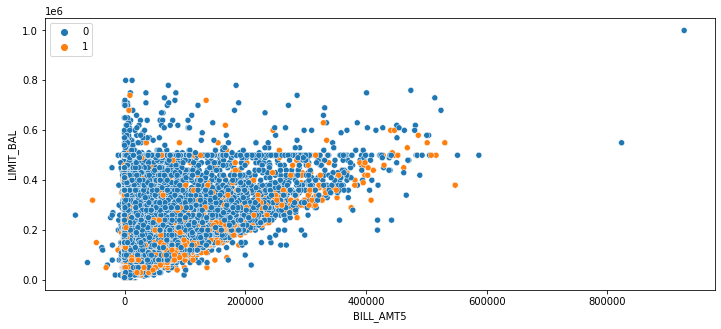

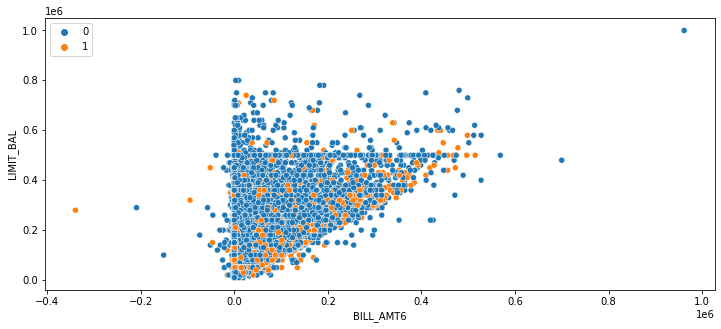

In [29]:
# Limit Balance and Bill Amounts(BILL_AMT1 to BILL_AMT6)

bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in bill_amt_cols:
  plt.figure(figsize=(12,5))
  sns.scatterplot(data=credit_df, y= credit_df['LIMIT_BAL'], x=credit_df[col], hue=credit_df['DEFAULT'])
  plt.legend()



*   Some customers who have -ve bill amount, ie, customers who have overpaid, are classified as defaulters 
*   There is a clear pattern as seen in the graphs, such as:
The number of customers drastically decreases after limit balance of 500K.
As limit balance increases, the min bill amount also increases.



### Chart

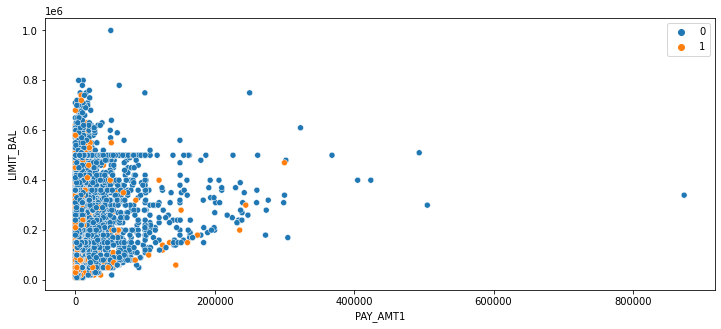

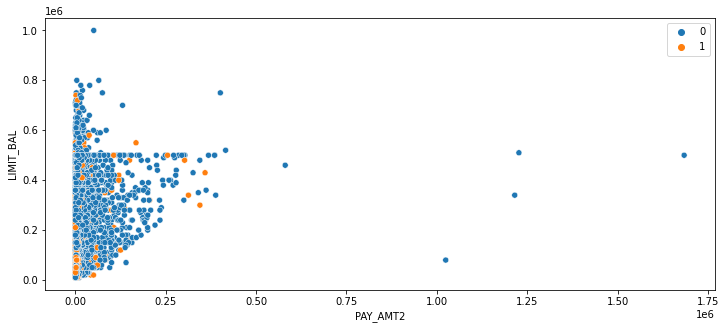

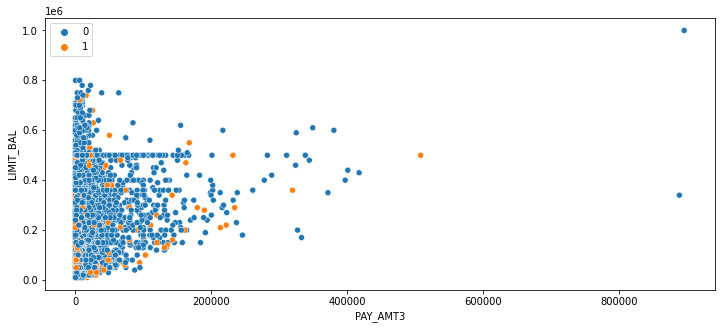

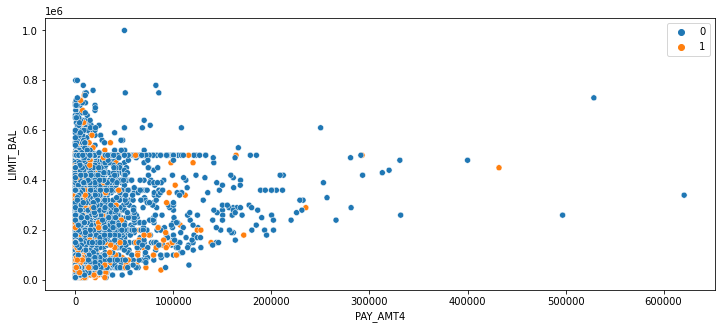

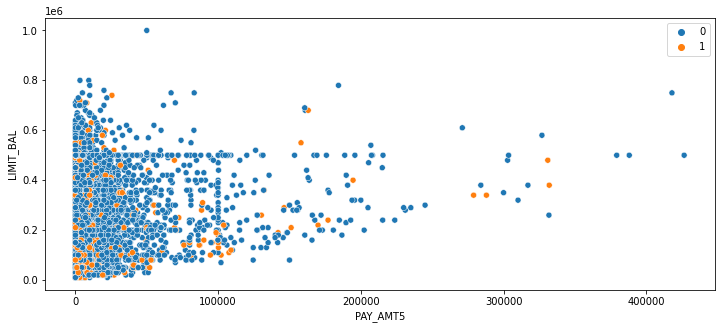

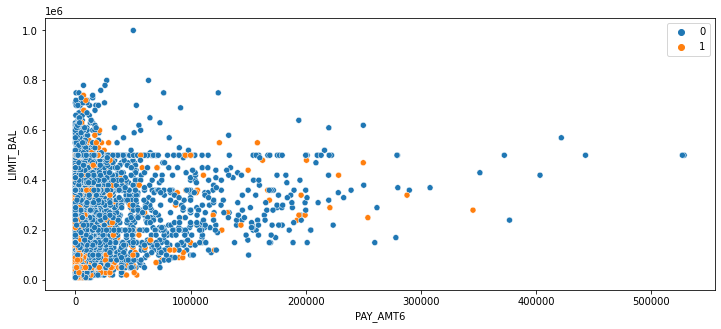

In [30]:
#Limit Balance and Payment Amount(PAY_AMT1 to PAY_AMT6)

pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in pay_amt_cols:
  plt.figure(figsize=(12,5))
  sns.scatterplot(data=credit_df, y= credit_df['LIMIT_BAL'], x=credit_df[col], hue=credit_df['DEFAULT'])
  plt.legend()

Here too, we are inclined to assume that there is some significance of limit balance on bill amounts.

#### Chart - 14 - Correlation Heatmap

<Axes: >

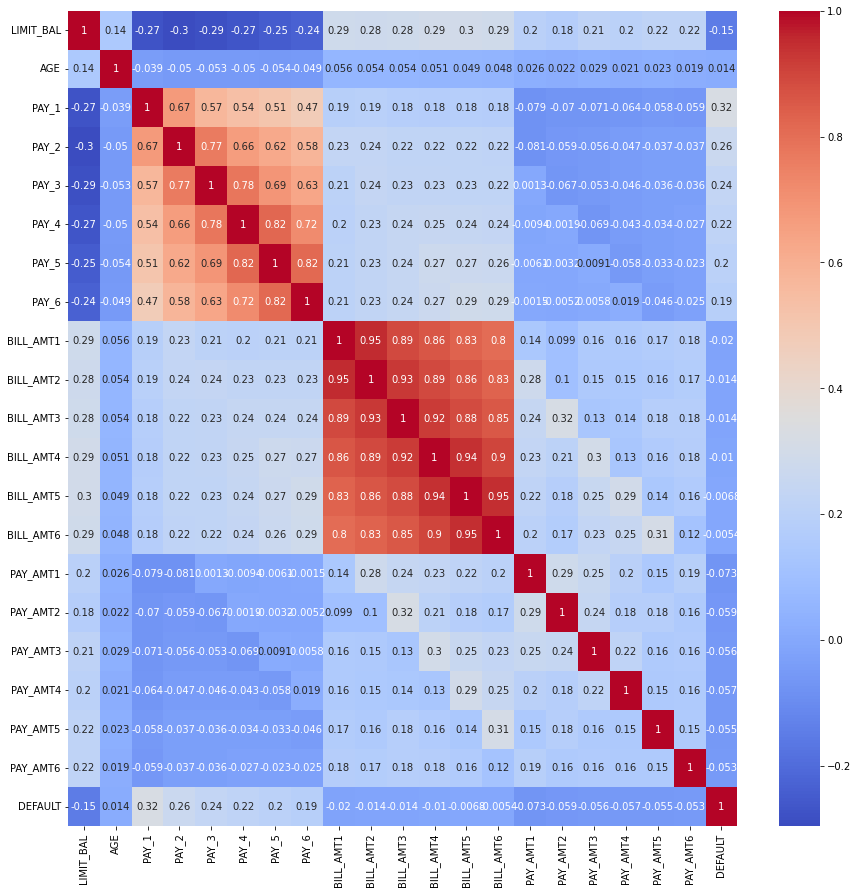

In [31]:
# Correlation Heatmap visualization code
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(15,15))
sns.heatmap(credit_df.corr(), cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.:- A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. Heat map gives the co-relation between the numerical data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-

*   PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 are moderately corelated with each other.
*   BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are also moderately corelated with each



#### Chart - 15 - Pair Plot 

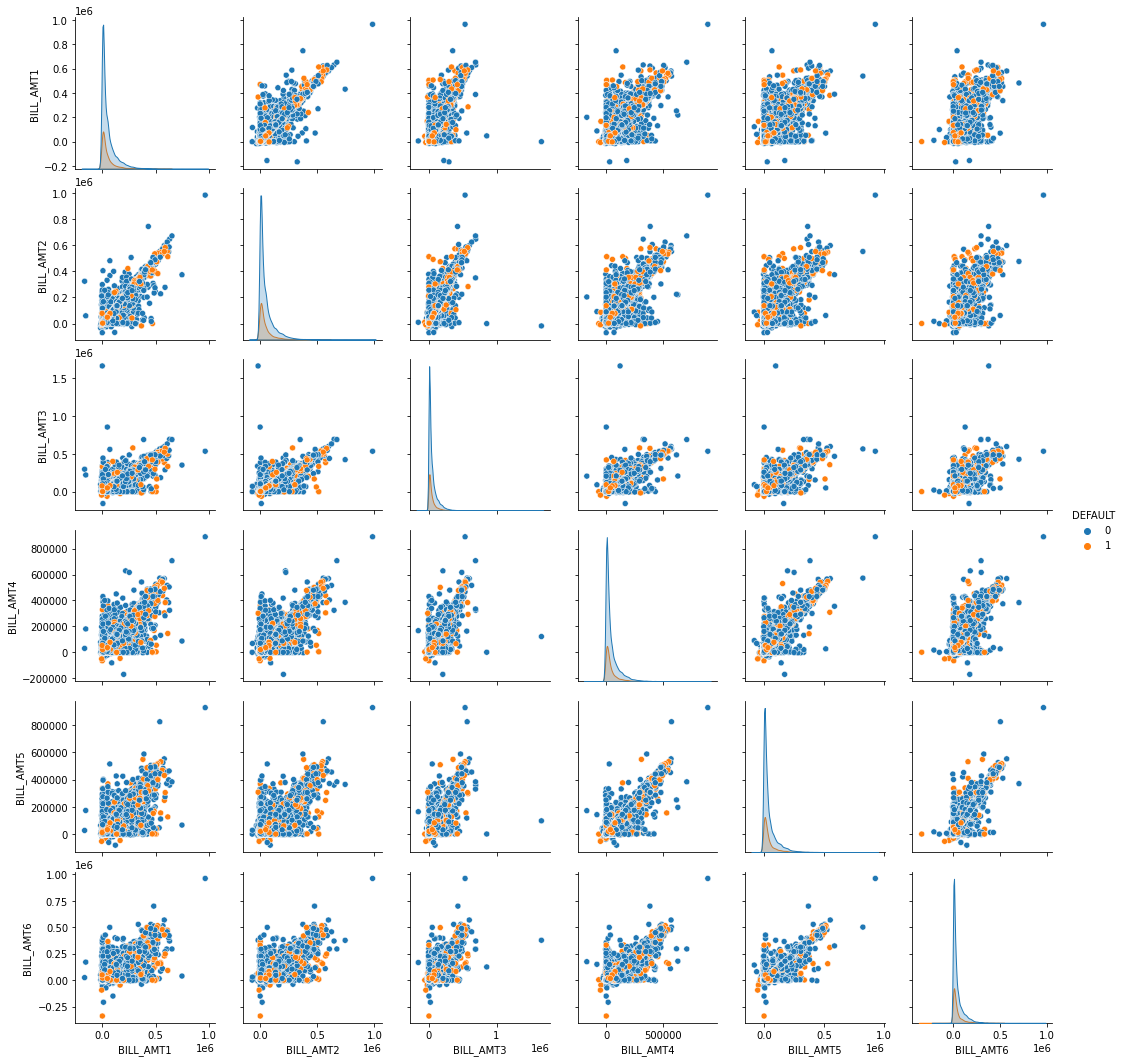

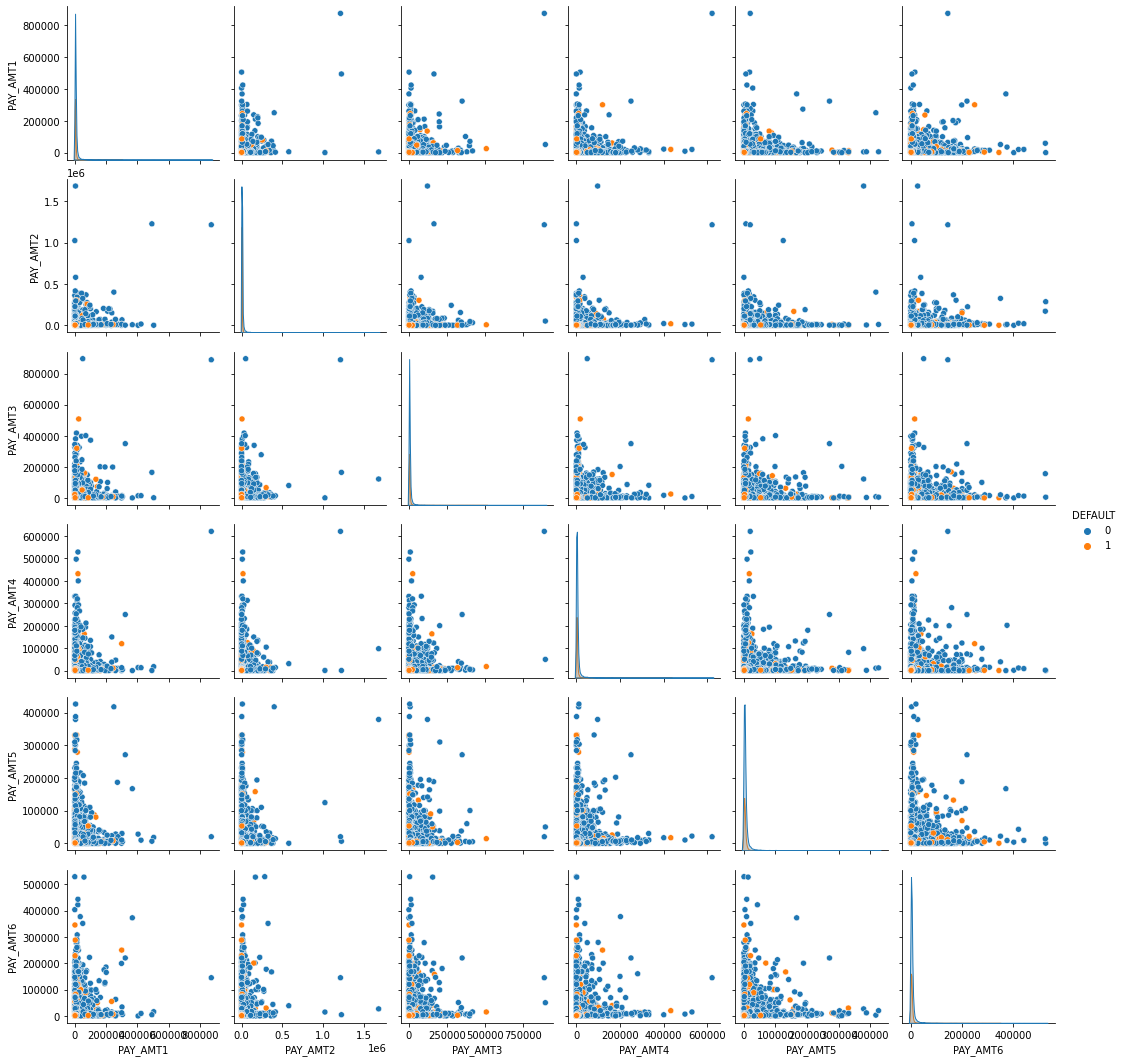

In [32]:
# Pair Plot visualization code
# plot columns with similar names to check the correlation
sns.pairplot(credit_df, vars=credit_df.columns[11:17], kind='scatter',hue= 'DEFAULT')
sns.pairplot(credit_df, vars=credit_df.columns[17:23],hue = 'DEFAULT')

##### 1. Why did you pick the specific chart?

Answer Here.:-  Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.:- Based on chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through codes and statistical testings.

Creating a class to calculate mean, median, variance, P value and all other metrics required for the calculation of hypothesis testing.

1) Men not defaulting are more than or equal to 40 years of AGE.

2) Customers defaulting have limit balance less than 100000.

3) Customers defaulting have total last bill amount of 50000.

In all of the hypothesis tests in this notebook, we will use a significance level of α = 0.05

In [33]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.:-Men not defaulting are more than or equal to 40 years of AGE.

Null Hypothesis: N = 40

Alternate Hypothesis : N < 40

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# DEFAULT COLUMN
# 0 = non-default; 1 = default

hypo_1 = credit_df[(credit_df['SEX']=='Male') & (credit_df["DEFAULT"]==0)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 40
sample_mean = hypo_1["AGE"].mean()
size = len(hypo_1)
std=(variance(hypo_1["AGE"]))**0.5

In [35]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="AGE")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.2867824212425077e-290


##### Which statistical test have you done to obtain P-Value?

Answer Here.:-I used Z-Test as the statistical testing to get the P-Value, and the results showed that the null hypothesis could not be rejected, and male customers who didn't default were over 40 years old.

##### Why did you choose the specific statistical test?

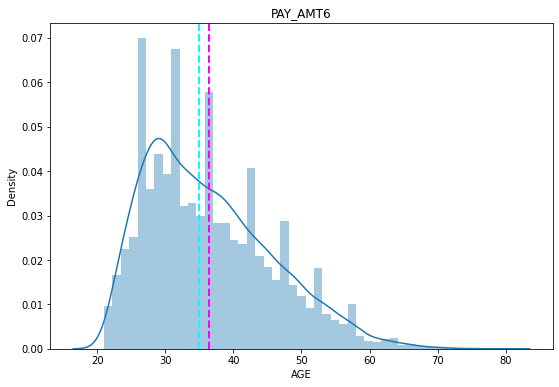

In [36]:

# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["AGE"])
sns.distplot(hypo_1["AGE"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()
     

In [37]:
mean_median_difference=hypo_1["AGE"].mean()- hypo_1["AGE"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 1.4286189683860258


Answer Here.:-The figure demonstrates that the mean and median are roughly equivalent; the difference between them is 1.38 (less than 10). As a result, the distribution is normal. I have used Z-Test directly as a result.

We have failed to reject the null hypothesis that N < 40

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.:-Customers defaulting have limit balance less than 100000

Null Hypothesis: N = 100000

Alternate Hypothesis : N > 100000

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
# DEFAULT COLUMN:
# 0 = non-default; 1 = default
hypo_2=credit_df[(credit_df["DEFAULT"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 100000
sample_mean = hypo_2["LIMIT_BAL"].mean()
size = len(hypo_2)
std=(variance(hypo_2["LIMIT_BAL"]))**0.5

In [39]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hypo_2,col="LIMIT_BAL")

# Getting Conclusion
print(conclusion(p))
     

Null Hypothesis rejected Successfully for p = 4.4753017364632867e-97


##### Which statistical test have you done to obtain P-Value?

Answer Here.:- I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis was wrong and that customers who defaulted had a limit balance of less than 100,000.

##### Why did you choose the specific statistical test?

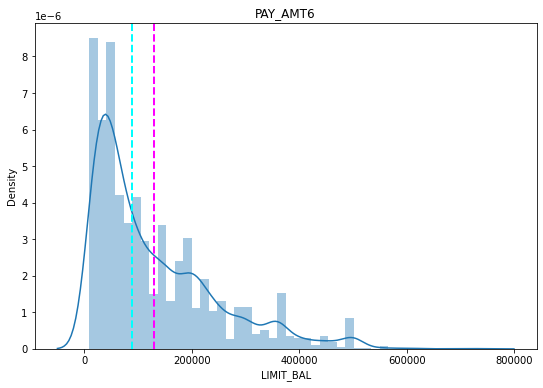

In [40]:

# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["LIMIT_BAL"])
sns.distplot(hypo_2["LIMIT_BAL"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [41]:
mean_median_difference=hypo_2["LIMIT_BAL"].mean()- hypo_2["LIMIT_BAL"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 40109.65641952984


Answer Here.:-The graph above demonstrates that the median is greater than the mean above 10,000. As a result, the distribution is positively skewed. Z-Test cannot be used with skewed data.

For small studies, non-parametric tests are most useful. In large studies, the use of non-parametric tests may answer the wrong question, causing readers confusion. Even with heavily skewed data, t-tests and the confidence intervals that go along with them should be used in studies with large sample sizes.

Therefore, the T-test can yield better results for skewed data. So, I used the t-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.:-Customers defaulting have total last bill amount of 50000.

Null Hypothesis: N = 50000

Alternate Hypothesis : N != 50000

Test Type: Two Tailed test

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
# DEFAULT COLUMN:
# 0 = non-default; 1 = default
hypo_3=credit_df[(credit_df["DEFAULT"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 50000
sample_mean = hypo_3["BILL_AMT1"].mean()
size = len(hypo_3)
std=(variance(hypo_3["BILL_AMT1"]))**0.5

In [43]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="BILL_AMT1")

# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.09980885383426222.


##### Which statistical test have you done to obtain P-Value?

Answer Here.:-I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis could not be rejected, so the statement that "Customers defaulted with a total last bill amount of 50,000" was correct.

##### Why did you choose the specific statistical test?

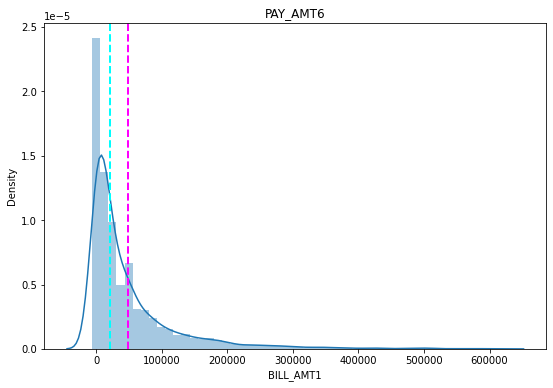

In [44]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["BILL_AMT1"])
sns.distplot(hypo_3["BILL_AMT1"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [45]:
mean_median_difference=hypo_3["BILL_AMT1"].median()- hypo_3["BILL_AMT1"].mean()
print("Mean Median Difference is :-",mean_median_difference)
     

Mean Median Difference is :- -28324.162296564195


Answer Here.:-The graph above demonstrates that the median is greater than the mean above 10,000. As a result, the distribution is positively skewed Z-Test cannot be used with skewed data.

For small studies, nonparametric tests are most useful. In large studies, the use of non-parametric tests may answer the wrong question, causing readers confusion. Even with heavily skewed data, t-tests and the confidence intervals that go along with them should be used in studies with large sample sizes.

Therefore, the T-test can yield better results for skewed data. So, I used the t-test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 5 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in credit_df.columns:  
  if credit_df[col].nunique() > 5:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT']


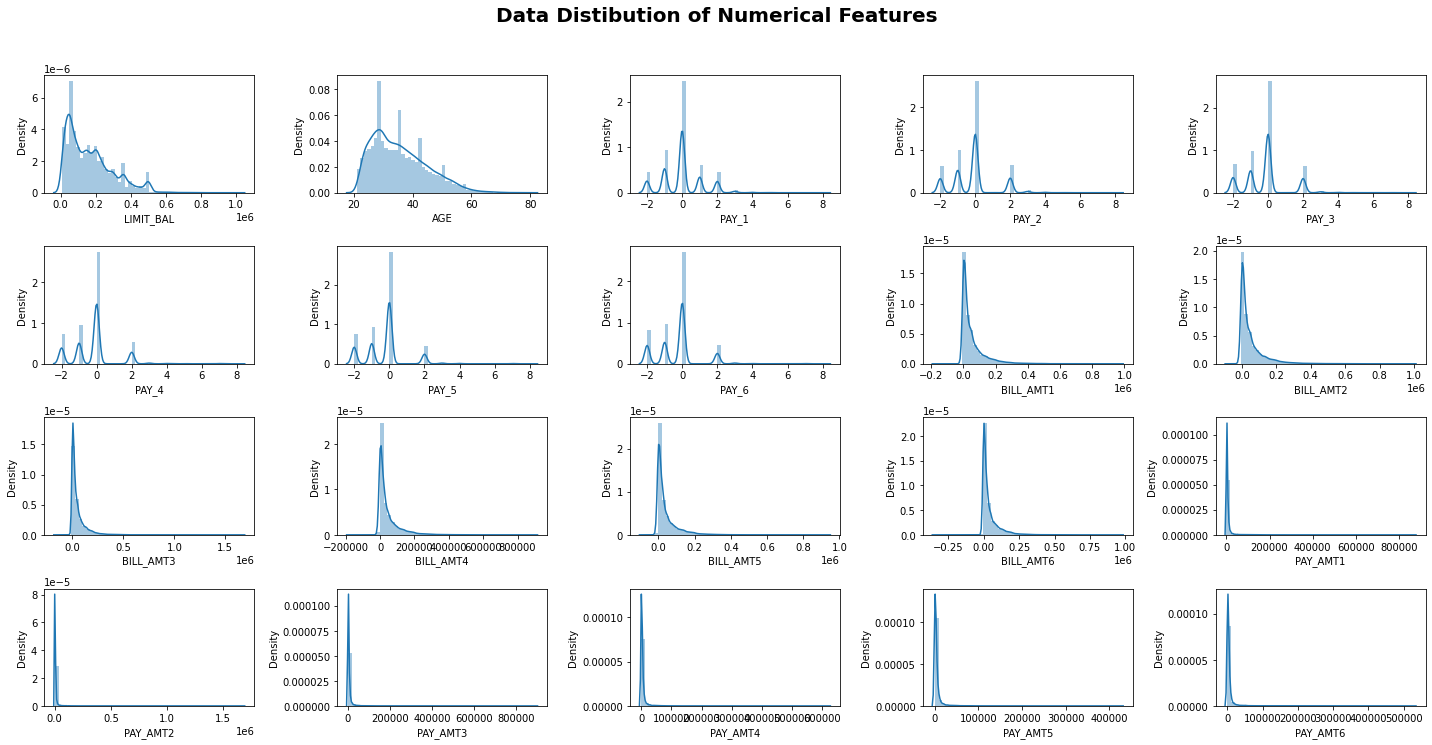

In [48]:
# figsize
plt.figure(figsize=(20,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)                       # subplots 5 rows, 5 columns

  # dist plots
  sns.distplot(credit_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout() 

For numerical features, we can see that the majority of distributions are right-skewed. The distribution of all the bill amounts and pay amounts is highly skewed to the right. It demonstrates that these columns have many outliers.

Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

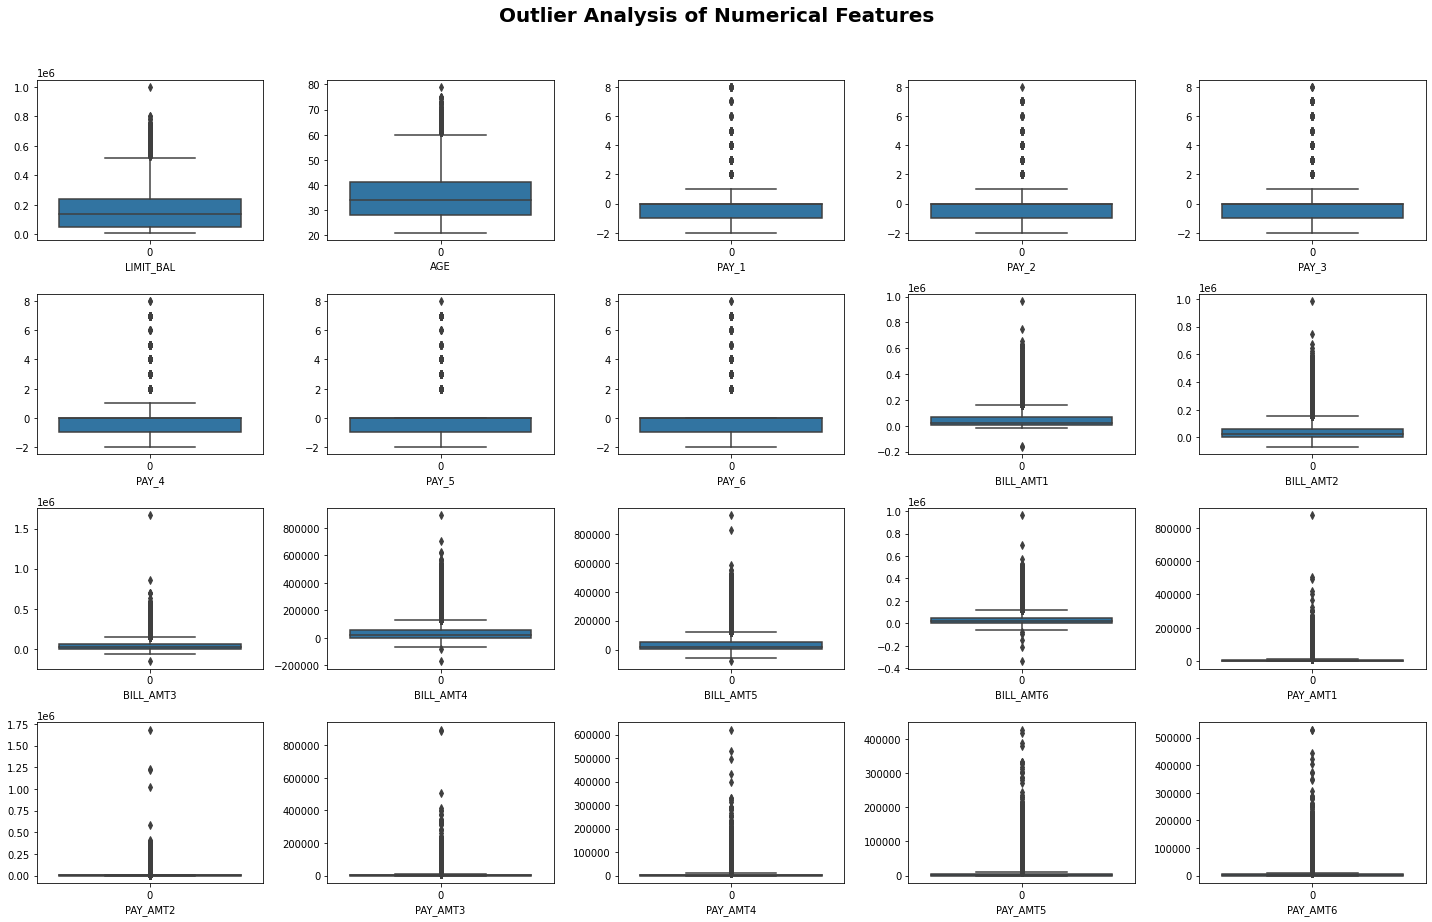

In [50]:
# figsize
plt.figure(figsize=(20,15))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 5 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

Outliers are visible in the all the bill amounts features and all the pay amounts features, and 'LIMIT_BAL' columns.

**Clipping Method**: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [51]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(credit_df):
    for col in credit_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = credit_df[col].quantile(0.25)
        q3 = credit_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        credit_df[col] = credit_df[col].clip(lower_bound, upper_bound)
    return credit_df

In [52]:

# using the function to treat outliers
credit_df = clip_outliers(credit_df)

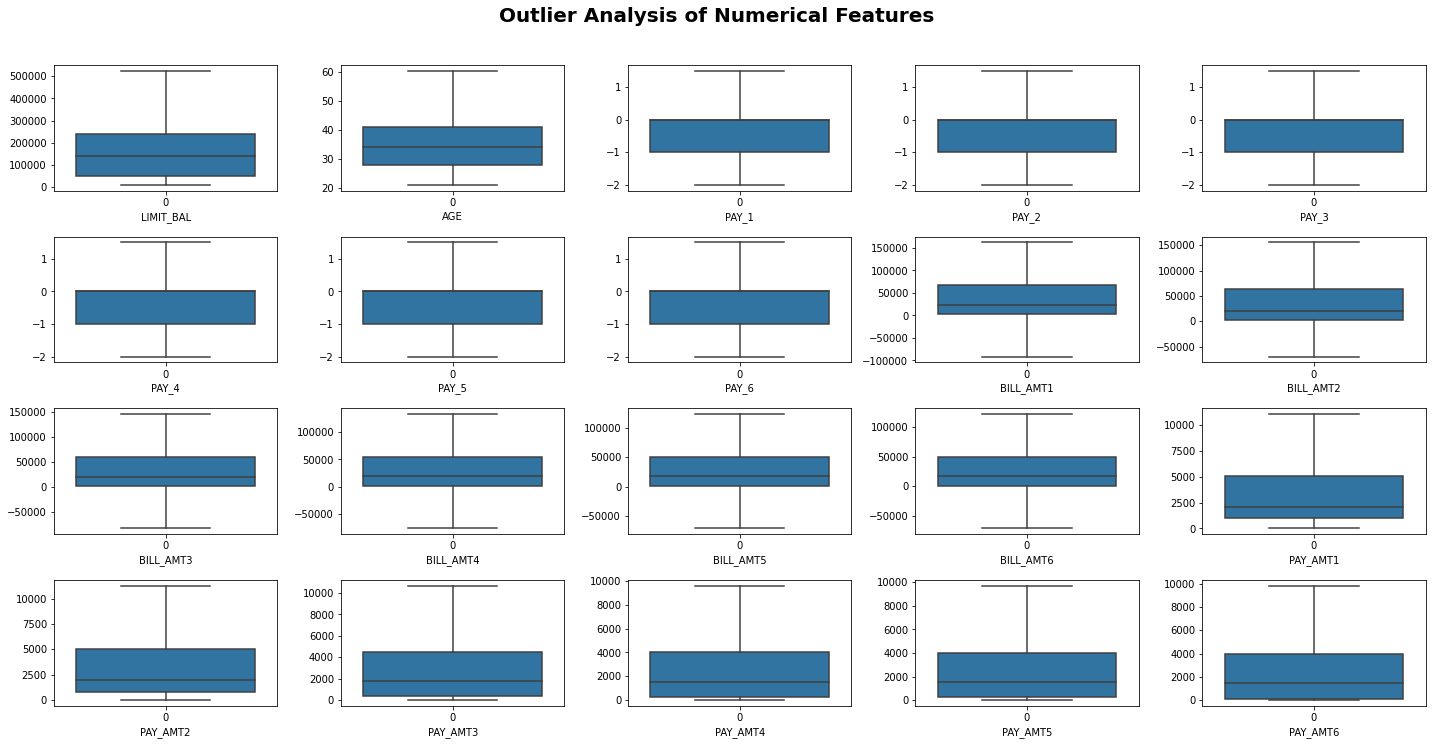

In [53]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(20,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 5 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

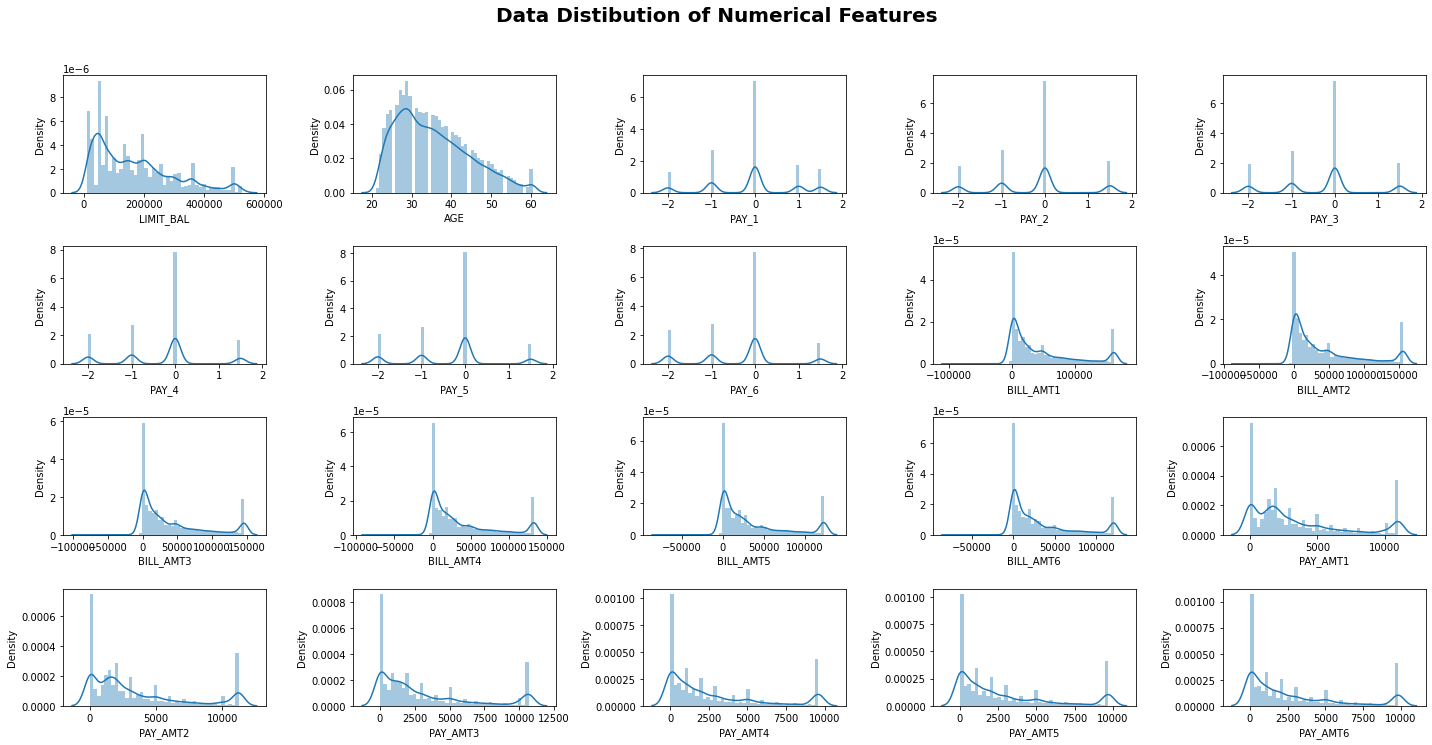

In [54]:

# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(20,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)                       # subplots 5 rows, 5 columns

  # dist plots
  sns.distplot(credit_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    
     

We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.:- Clipping Method: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

### 3. Categorical Encoding

In [55]:
# Encode your categorical columns
# Encoding categorical variables
credit_df = pd.get_dummies(credit_df,columns=['SEX', 'EDUCATION','MARRIAGE'])

credit_df.head()

LIMIT_BAL   AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0    20000.0  24.0    1.5    1.5   -1.0   -1.0   -2.0   -2.0     3913.0   
1   120000.0  26.0   -1.0    1.5    0.0    0.0    0.0    1.5     2682.0   
2    90000.0  34.0    0.0    0.0    0.0    0.0    0.0    0.0    29239.0   
3    50000.0  37.0    0.0    0.0    0.0    0.0    0.0    0.0    46990.0   
4    50000.0  57.0   -1.0    0.0   -1.0    0.0    0.0    0.0     8617.0   

   BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     3102.0      689.0        0.0        0.0        0.0       0.0     689.0   
1     1725.0     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2    14027.0    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3    48233.0    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4     5670.0    35835.0    20940.0    19146.0    19131.0    2000.0   11250.5   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  SEX_Female  SEX_Male  \
0       0.0       0.0       0.0       0.0        1           1         0   
1    1000.0    1000.0       0.0    2000.0        1           1         0   
2    1000.0    1000.0    1000.0    5000.0        0           1         0   
3    1200.0    1100.0    1069.0    1000.0        0           1         0   
4   10000.0    9000.0     689.0     679.0        0           0         1   

   EDUCATION_Graduation  EDUCATION_High_School  EDUCATION_Others  \
0                     0                      0                 0   
1                     0                      0                 0   
2                     0                      0                 0   
3                     0                      0                 0   
4                     0                      0                 0   

   EDUCATION_University  MARRIAGE_Divorce  MARRIAGE_Married  MARRIAGE_Others  \
0                     1                 0                 1                0   
1                     1                 0                 0                0   
2                     1                 0                 0                0   
3                     1                 0                 1                0   
4                     1                 0                 1                0   

   MARRIAGE_Single  
0                0  
1                1  
2                1  
3                0  
4                0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.:- ohe hot encoding

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [58]:
# copying this data to protect the work done till now 
df_feature = credit_df.copy()

In [59]:
# Manipulate Features to minimize feature correlation and create new features
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 5 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in df_feature.columns:  
  if df_feature[col].nunique() > 5:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Categorical Features : ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT', 'SEX_Female', 'SEX_Male', 'EDUCATION_Graduation', 'EDUCATION_High_School', 'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Divorce', 'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single']




*   Negative bill amounts are not possible in a credit card dataset as a bill represents the amount of money that the credit card holder owes to the bank. It is always a positive value. However, negative values can occur due to data entry errors or other issues. Hence we are dropping all negative bill amount instances.

In [60]:
df_feature = df_feature[df_feature['BILL_AMT1'] >= 0]


In [61]:
# dropping our target variable from categorical features list         
categorical_features.remove('DEFAULT')

In [62]:
# checking the data type of each feature
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LIMIT_BAL              29410 non-null  float64
 1   AGE                    29410 non-null  float64
 2   PAY_1                  29410 non-null  float64
 3   PAY_2                  29410 non-null  float64
 4   PAY_3                  29410 non-null  float64
 5   PAY_4                  29410 non-null  float64
 6   PAY_5                  29410 non-null  float64
 7   PAY_6                  29410 non-null  float64
 8   BILL_AMT1              29410 non-null  float64
 9   BILL_AMT2              29410 non-null  float64
 10  BILL_AMT3              29410 non-null  float64
 11  BILL_AMT4              29410 non-null  float64
 12  BILL_AMT5              29410 non-null  float64
 13  BILL_AMT6              29410 non-null  float64
 14  PAY_AMT1               29410 non-null  float64
 15  PA



*   All the categorical columns have already been encoded, we just need to convert the categorical column data type as an object or category.




In [63]:
# Cast values in the categorical columns as type str.                 # can use astype('category') too.
df_feature[categorical_features] = df_feature[categorical_features].astype(str)

# checking the result
df_feature.dtypes

LIMIT_BAL                float64
AGE                      float64
PAY_1                     object
PAY_2                     object
PAY_3                     object
PAY_4                     object
PAY_5                     object
PAY_6                     object
BILL_AMT1                float64
BILL_AMT2                float64
BILL_AMT3                float64
BILL_AMT4                float64
BILL_AMT5                float64
BILL_AMT6                float64
PAY_AMT1                 float64
PAY_AMT2                 float64
PAY_AMT3                 float64
PAY_AMT4                 float64
PAY_AMT5                 float64
PAY_AMT6                 float64
DEFAULT                    int64
SEX_Female                object
SEX_Male                  object
EDUCATION_Graduation      object
EDUCATION_High_School     object
EDUCATION_Others          object
EDUCATION_University      object
MARRIAGE_Divorce          object
MARRIAGE_Married          object
MARRIAGE_Others           object
MARRIAGE_S

#### 2. Feature Selection

The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

<Axes: >

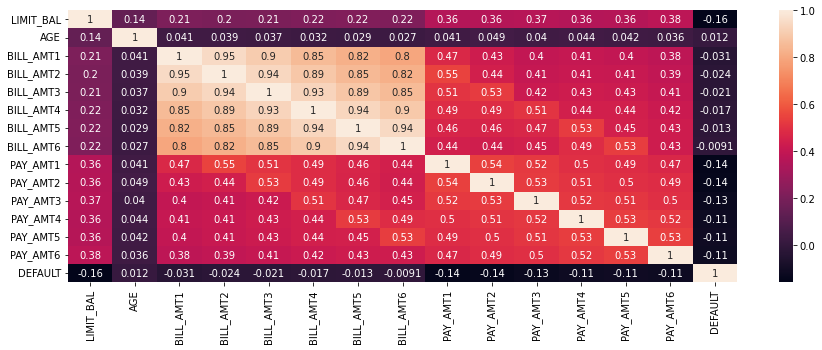

In [64]:
# Select your features wisely to avoid overfitting
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_feature.corr(), annot=True) 

In [65]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [66]:
# checking the highly correlated features
correlation(df_feature, 0.7)          # setting threshold of 0.7

{'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'}

In [67]:
# droping columns due to multi-collinearity

df_feature.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1, inplace=True)

<Axes: >

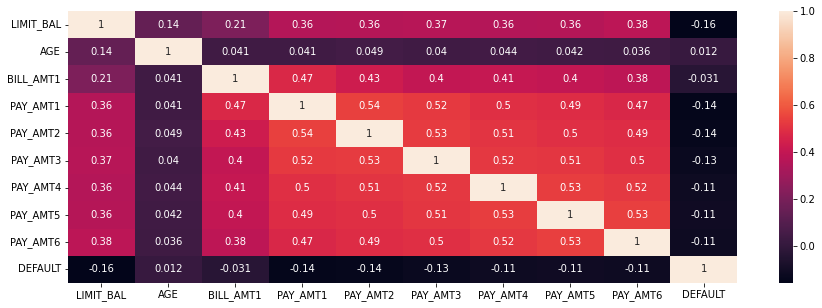

In [68]:
# Plotting correlation heatmap again
plt.figure(figsize=(15,5))
sns.heatmap(df_feature.corr(), annot=True)  

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

No, Their is no need of data transformation. 

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.Yes, the target column is imblanced  in 1:4 ratio.


When there are significantly more instances of certain classes than others, the issue of class imbalance typically arises. Class imbalance in the target class is a problem for machine learning models because it can result in biased predictions. That is why we need to balance the target class.

0    22883
1     6527
Name: DEFAULT, dtype: int64
 


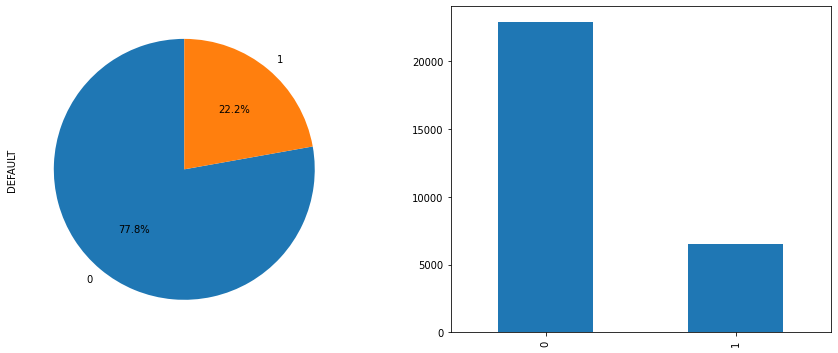

In [69]:
# Handling Imbalanced Dataset (If needed)

# Dependant Column Value Counts
print(df_feature.DEFAULT.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
df_feature['DEFAULT'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
df_feature['DEFAULT'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

In [70]:
## Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

X = df_feature.drop(columns='DEFAULT')     # independent features
y = df_feature['DEFAULT']                  # dependent features

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 22883, 1: 6527})
After Handling Imbalanced class Counter({1: 22883, 0: 22883})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.:-**The data set differs significantly. Our data, therefore, lack balance. We will use the Synthetic Minority Oversampling Technique (SMOTE) to resolve this issue.**



*   SMOTE (Synthetic Minority Oversampling Technique) works by randomly selecting a minority class point and calculating its k-nearest neighbors. Between the selected point and its neighbors, the synthetic points are added. Continue with the steps until the data is balanced.



### 8. Data Splitting

In [71]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
     

(36612, 25)
(9154, 25)


##### What data splitting ratio have you used and why? 

Answer Here.:- I used 80:20 ratio of my dataset. Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model. Data splitting is an important aspect of data science, particularly for creating models based on data.

### 6. Data Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Two ways of feature scaling:

Min max normalization

Standardisation

In this project I'm going to use the standardisation method with the help of the StandardScaler() function.

In [72]:
# Scaling your data
# Initialize the scaler
scaler = StandardScaler()

# Scale the features using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***



*   Accuracy: Simply put, accuracy is the percentage of times that the classifier correctly predicts. The ratio of the total number of predictions to the number of correct predictions is how accuracy is defined. If a model has a 99 percent accuracy rate, you might think it is doing very well. However, this is not always the case and can be misleading in some situations.

When the target class is well-balanced, accuracy is useful, but it is not a good choice for unbalanced classes.
*   Confusion Matrix: The Confusion Matrix is a performance measurement for classification problems in machine learning in which there can be two or more classes output. It is a table with actual and predicted value combinations. The table that is frequently used to describe the performance of a classification model on a set of test data for which the true values are known is referred to as a confusion matrix. It is extremely helpful for determining the AUC-ROC curves, precision, recall, and accuracy.


*   Precision: Precision explains the percentage of correctly predicted cases that were actually successful. When False Positives are more of a concern than False Negatives, precision can be useful.

A label's precision is calculated by dividing the number of predicted positives by the number of true positives.

*   Recall: Recall describes the proportion of actual positive cases that our model correctly predicted. When False Negative is more important than False Positive, this metric is helpful. In medical cases, it matters whether we raise a false alarm or not, but the actual positive cases should not go unnoticed. The number of true positives divided by the total number of actual positives is the definition of recall for a label.
*   F1 Score: This score incorporates both Precision and Recall metrics. When Precision and Recall are equal, it reaches its peak.

The harmonic mean of recall and precision is the F1 Score.


*   AUC-ROC: The Receiver Operator Characteristic (ROC) is a probability curve that separates the "signal" from the "noise" by plotting the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold values. The measure of a classifier's ability to differentiate between classes is the Area Under the Curve (AUC). This simply indicates that the classifier is able to precisely differentiate between all Positive and Negative class points when AUC is equal to 1. The classifier would correctly identify all negatives as positives when the AUC was zero.





In [73]:
# empty list for appending performance metric score 
model_result = []

def predict(ml_model, model_name):
  
  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  ''' 
  
  # model fitting
  model = ml_model.fit(X_train, y_train)
  
  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics ''' 
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')
  
  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)

  '''Calculate threshold values for K-S chart'''

  # Compute the false positive rate, true positive rate, and thresholds for the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

  # Calculate the maximum difference between the true positive rate and false positive rate
  ks_stat = tpr - fpr

  # Compute the threshold that maximizes the difference between the false positive rate and the true positive rate
  ks_threshold = thresholds[np.argmax(ks_stat)]

  # Plot the KS chart
  plt.plot(thresholds, tpr, label='True Positive Rate')
  plt.plot(thresholds, fpr, label='False Positive Rate')
  plt.plot(thresholds, ks_stat, label='KS Statistic')
  plt.axvline(ks_threshold, color='black', linestyle='--', label=f'KS Threshold: {ks_threshold:.2f}')
  plt.title('KS Chart')
  plt.xlabel('Threshold')
  plt.ylabel('Rate')
  plt.legend()
  plt.show()


  '''Using the score from the performance metrics to create the final model_result'''
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})
     

### ML Model - 1  :- LogisticRegression

Logistic regression is one of the simplest algorithms for estimating the relationship between independent variables and a single dependent binary variable and determining the likelihood of an event occurring.

The regulation parameter C controls the trade-off between keeping the model simple (underfitting) and increasing its complexity (overfitting). With increasing values of C, the model becomes more complicated and the power of regulation decreases, resulting in an overfitting of the data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

train accuracy : 0.671
test accuracy : 0.674
train precision : 0.664
test precision : 0.667
train recall : 0.689
test recall : 0.699
train f1 : 0.677
test f1 : 0.682
train roc_auc : 0.74
test roc_auc : 0.742
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      4569
           1       0.67      0.70      0.68      4585

    accuracy                           0.67      9154
   macro avg       0.67      0.67      0.67      9154
weighted avg       0.67      0.67      0.67      9154

--------------------------------------------------------------------------------


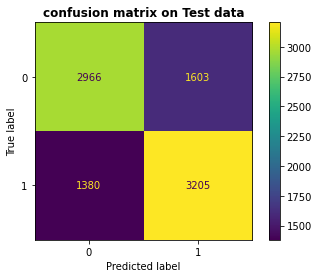

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      1      0      1      1      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


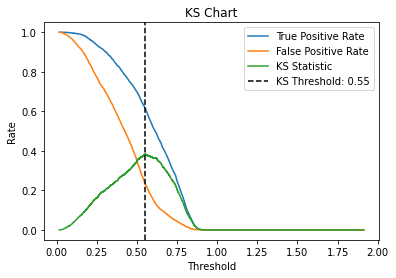

In [74]:
predict(LogisticRegression(), 'LogisticRegression')

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2  :- Random Forest

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# Visualizing evaluation Metric Score chart
rf_params = {'n_estimators': [50,75],           # number of trees in the ensemble
             'max_depth': [70,80],              # maximum number of levels allowed in each tree.
             'min_samples_split': [2,5],        # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,4]}         # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, verbose=2, n_jobs=-1)

# model fitting 
rf_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [70, 80], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75]},
             verbose=2)

In [76]:
optimal_model = rf_gridsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

train accuracy : 0.944
test accuracy : 0.874
train precision : 0.981
test precision : 0.915
train recall : 0.906
test recall : 0.826
train f1 : 0.942
test f1 : 0.868
train roc_auc : 0.995
test roc_auc : 0.934
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4569
           1       0.91      0.83      0.87      4585

    accuracy                           0.87      9154
   macro avg       0.88      0.87      0.87      9154
weighted avg       0.88      0.87      0.87      9154

--------------------------------------------------------------------------------


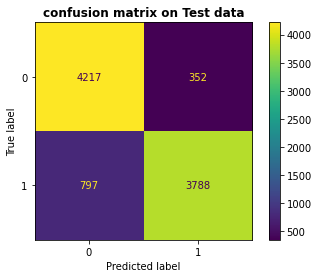

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      0      0      0      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


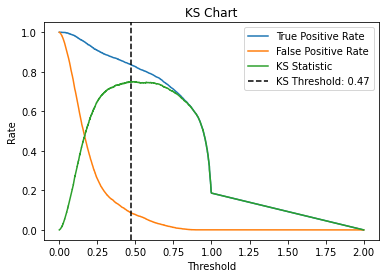

In [77]:
optimal_model =RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)
predict(optimal_model, 'RandomForest')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.:- Hyperparameter Tunning using RandomizedSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3  :- XGBoost

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# # Visualizing evaluation Metric Score chart

xgb_params = {'n_estimators': [75,100],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)
     


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[08:22:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7],
                         'n_estimators': [75, 100]},
             verbose=2)

In [81]:
optimal_model = xgb_gridsearch.best_estimator_
optimal_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

[08:23:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

train accuracy : 0.924
test accuracy : 0.878
train precision : 0.969
test precision : 0.925
train recall : 0.875
test recall : 0.823
train f1 : 0.92
test f1 : 0.871
train roc_auc : 0.985
test roc_auc : 0.934
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4569
           1       0.93      0.82      0.87      4585

    accuracy                           0.88      9154
   macro avg       0.88      0.88      0.88      9154
weighted avg       0.88      0.88      0.88      9154

--------------------------------------------------------------------------------


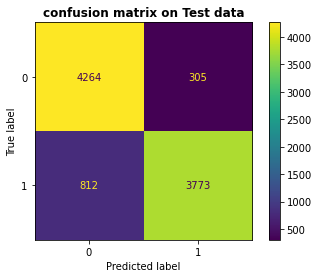

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      0      0      0      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


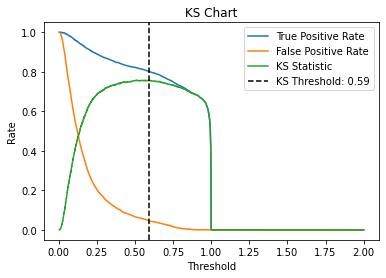

In [82]:
predict(optimal_model, 'XGBoost')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [83]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

model  train_accuracy  test_accuracy  train_precision  \
0  LogisticRegression           0.671          0.674            0.664   
1        RandomForest           0.944          0.874            0.981   
2             XGBoost           0.924          0.878            0.969   

   test_precision  train_recall  test_recall  train_f1  test_f1  \
0           0.667         0.689        0.699     0.677    0.682   
1           0.915         0.906        0.826     0.942    0.868   
2           0.925         0.875        0.823     0.920    0.871   

   train_roc_auc  test_roc_auc  
0          0.740         0.742  
1          0.995         0.934  
2          0.985         0.934

The majority and minority of the count in our dataset come from the negative and positive, respectively. Accuracy scores aren't very helpful when dealing with imbalanced data or classes.

In order to avoid false negatives, we need to minimize situations where the model predicts that a customer will not default, when in reality, they do. Similarly, to minimize false positives, we need to increase the precision and recall scores, which will positively impact the f1_score. In our scenario, recall should take precedence over precision. Hence, we should aim for moderate f1_score and high recall scores. As a result, the model's recall score will be the primary focus of our project.

Balanced accuracy is a better metric than F1 when positives and negatives are equally important. When more attention is required, F1 is an excellent scoring metric for imbalanced data.

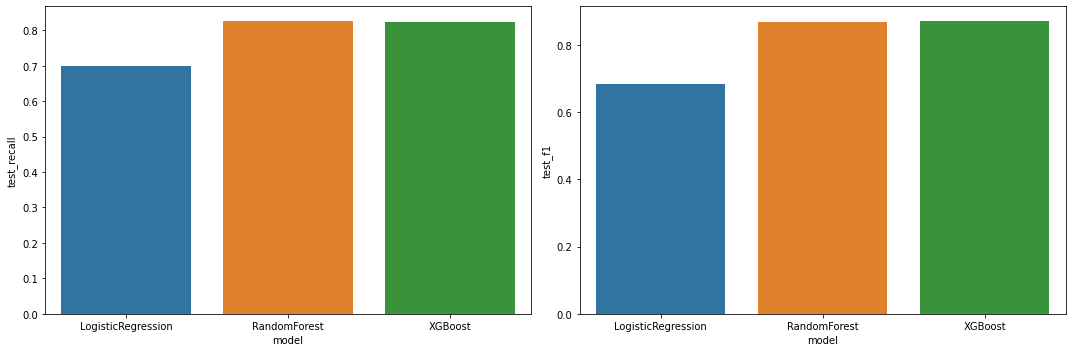

In [84]:
# plotting graph to compaire model performance of all the models
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0])   # Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])       # Model vs F1 score 
plt.tight_layout()

We didn't want to mispredict a customer's default status when he has the defaulted, so the final model we chose is Random Forest and XGBoost

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here. :-

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we tackled a classification problem in which we had to classify and predict whether a credit card holder is likely to default on their payments. This problem is important for credit card companies, as it allows them to identify risky borrowers and take appropriate measures to minimize their losses.


*   The number of default payments in the data is low in number compared to the number of not default payments. The count of default payments is 6636 while the count of not default payments is 23364.

*   The data spread for 'AGE' Column is 21 to 79. Most of the customers fall under the age bracket 25 to 35 . 

*   The customers in the age bracket 25 to 35 are more non-defaulters After the age of 40, we see slightly more defaulters than non-defaulters.

*   On average females gets more limit than males. The female has an average of 156k while the male has an average of 150k.

*   Number of males who defaulted is less in number but the proportion is greater. It might be possible because males have fewer credit limits on their credit cards
*   With the rise in education level proportion of default decreases. We can see that Graduate School education level customers defaulted by 19% while University Education level customer default percentage is 24% followed by High School with 25%. In almost all education levels females have less default percentage than males.

*   With the increase in age the count of customers decreases. Most of the customers belong to the 20-30 year age group followed by the 30-40 age group.  With an increase in the age group the count of default payments decreases.

*   When we differentiate the education categories based of default value, we see that the median age is somewhat similar for both defaulters and non-dfaulters for every group except for 'Others'. Here the median age of defaulters is slightly higher than non-defulters. This should be noted.

*   Customers with repayment status 0 and below have less number of defaulters, altogether. As the repayment status moves higher values, ie, as the payment delay increases months, there are more defaulters thn non-defaulters.

*   Customers who have high payment amounts are mostly people below 50 years of age. The number of defaulters below 30 years of age and low payment amounts have decreased as we move from April to September.

*   PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 are moderately corelated with each other.

*   BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are also moderately corelated with each


*   When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, focusing more on the Recall score and F1 score because we are dealing with credit card data and our data is unbalanced.

Our highest recall score, 0.826, came from Random Forest.

*   The XGBoost and RandomForestClassifier also provided the best approach to achieving our goal. We were successful in achieving a respective f1-score of 0.866, 0.871 and 0.868.


The recall score is of the utmost significance in the banking field, where we place a greater emphasis on reducing false negative values because we do not want to mispredict a person's default status when he has defaulted. With recall scores of 0.826, and 0.823, respectively, RandomForest, and XGB performed the best.





### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***